# Ce projet stratégique est appelé « DATAImmo »
#  Création des modèle pour mieux prévoir le prix de vente des biens immobiliers. 
1-analyser le marché et aider les différentes agences à mieux accompagner leurs clients.
   source : https://www.data.gouv.fr/fr/datasets/5c4ae55a634f4117716d5656/

In [9]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
cwd = os.getcwd()

In [10]:
df = pd.read_excel("immo.xlsx")
# df = pandas.read_excel("sample.xls")
df

C:\Users\pc\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
0                  NaN                 NaN             NaN             NaN   
1                  NaN                 NaN             NaN             NaN   
2                  NaN                 NaN             NaN             NaN   
3                  NaN                 NaN             NaN             NaN   
4                  NaN                 NaN             NaN             NaN   
...                ...                 ...             ...             ...   
34164              NaN                 NaN             NaN             NaN   
34165              NaN                 NaN             NaN             NaN   
34166              NaN                 NaN             NaN             NaN   
34167              NaN                 NaN             NaN             NaN   
34168              NaN                 NaN             NaN             NaN   

       3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
0                 NaN             NaN             NaN               1   
1                 NaN             NaN             NaN               1   
2                 NaN             NaN             NaN               1   
3                 NaN             NaN             NaN               1   
4                 NaN             NaN             NaN               1   
...               ...             ...             ...             ...   
34164             NaN             NaN             NaN               1   
34165             NaN             NaN             NaN               1   
34166             NaN             NaN             NaN               1   
34167             NaN             NaN             NaN               1   
34168             NaN             NaN             NaN               1   

      Date mutation Nature mutation  ...  Surface Carrez du 5eme lot  \
0        2020-02-03           Vente  ...                         NaN   
1        2020-01-02           Vente  ...                         NaN   
2        2020-01-08           Vente  ...                         NaN   
3        2020-01-06           Vente  ...                         NaN   
4        2020-01-07           Vente  ...                         NaN   
...             ...             ...  ...                         ...   
34164    2020-06-30           Vente  ...                         NaN   
34165    2020-06-30           Vente  ...                         NaN   
34166    2020-06-25           Vente  ...                         NaN   
34167    2020-06-25           Vente  ...                         NaN   
34168    2020-06-11           Vente  ...                         NaN   

       Nombre de lots Code type local   Type local Identifiant local  \
0                   1               2  Appartement               NaN   
1                   2               2  Appartement               NaN   
2                   2               2  Appartement               NaN   
3                   1               1       Maison               NaN   
4                   2               2  Appartement               NaN   
...               ...             ...          ...               ...   
34164               1               2  Appartement               NaN   
34165               1               2  Appartement               NaN   
34166               2               2  Appartement               NaN   
34167               1               2  Appartement               NaN   
34168               1               2  Appartement               NaN   

      Surface reelle bati Nombre pieces principales  Nature culture  \
0                      52                         2             NaN   
1                      48                         3             NaN   
2                     130                         6             NaN   
3                     109                         5             NaN   
4                      91                         4             NaN   
...                   ...            

In [11]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les données 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',round((df.isna().sum()*100/df.shape[0]),2).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', round((df.isna().sum()*100/df.shape[0]),2).sort_values(ascending=True))
    print('\n')
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isna(), cbar=False)

1-Table immo :
Nombre de valeurs manquantes = 748980
Nombre de cellulles totales = 1537605
Pourcentage de valeurs manquantes =  48.71 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.05       1
0.39       1
93.64      1
2.75       1
96.65      1
99.98      1
99.26      2
100.00    17
0.00      20
dtype: int64


Pourcentage de valeurs manquantes par variable/colonne =
 1er lot                         0.00
Code departement                0.00
Commune                         0.00
Code postal                     0.00
Code ID commune                 0.00
Voie                            0.00
Code voie                       0.00
Code type de voie               0.00
No plan                         0.00
Code commune                    0.00
Surface Carrez du 1er lot       0.00
Nature mutation                 0.00
Date mutation                   0.00
No disposition                  0.00
Nombre de lots                  0.00
Code type local                 0.00
Type local      

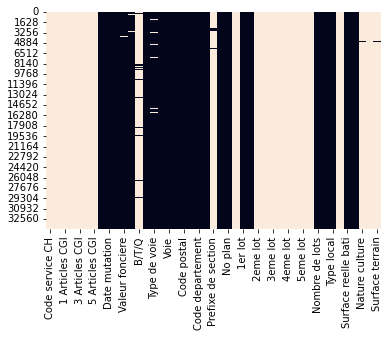

In [12]:
#Appel de la fonction val_manq 
#Affichage des pourcentages de valeurs manquantes des 3 jeux de données 
print('1-Table immo :')
val_manq(df)
print('\n')



In [13]:
def colonnes_vides(df):
    l=[col for col in df.columns if df[col].isnull().all()]
    print('Nombre de colonnes vides =',len(l))
    for cv in l:
        df.pop(cv)

In [14]:
df=df.copy()
colonnes_vides(df)
 

Nombre de colonnes vides = 17


(34169, 28)

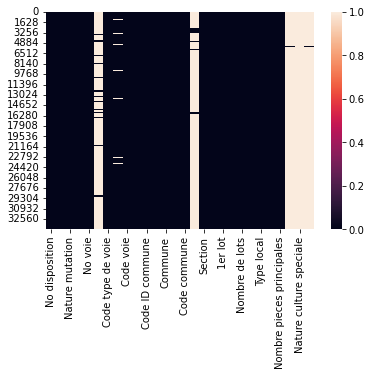

In [15]:
sns.heatmap(df.isna())
df.shape

In [18]:
def check_train(dataframe, head=5):
    print("#####################describe####################")
    print(dataframe.describe())
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_train(df)

#####################describe####################
       No disposition  Valeur fonciere       No voie  Code type de voie  \
count    34169.000000     3.415100e+04  34036.000000       34169.000000   
mean         1.002312     2.528471e+05    450.483429           4.026574   
std          0.049823     3.252594e+05   1712.852166           9.272656   
min          1.000000     5.375000e+02      1.000000           0.000000   
25%          1.000000     1.040000e+05      8.000000           0.000000   
50%          1.000000     1.690000e+05     22.000000           0.000000   
75%          1.000000     2.850000e+05     66.000000           2.000000   
max          3.000000     9.000000e+06   9999.000000          79.000000   

       Code ID commune   Code postal  Code commune  Prefixe de section  \
count     34169.000000  34168.000000  34169.000000         1143.000000   
mean       2009.368931  62089.903243    190.210630          736.810149   
std        1051.410563  28259.658901    167.448418  

In [19]:
df = df.fillna(0)

In [20]:
df.nunique()

No disposition                   3
Date mutation                  158
Nature mutation                  1
Valeur fonciere               9681
No voie                       1469
B/T/Q                           25
Code type de voie               80
Type de voie                    80
Code voie                     5765
Voie                         14133
Code ID commune               3215
Code postal                   2450
Commune                       3110
Code departement                96
Code commune                   666
Prefixe de section             159
Section                        464
No plan                       1861
1er lot                       1555
Surface Carrez du 1er lot    10397
Nombre de lots                  14
Code type local                  2
Type local                       2
Surface reelle bati            256
Nombre pieces principales       12
Nature culture                   8
Nature culture speciale          5
Surface terrain                201
dtype: int64

In [21]:
df.columns = df.columns.str.replace(' ', '') 

In [22]:
df.columns

Index(['Nodisposition', 'Datemutation', 'Naturemutation', 'Valeurfonciere',
       'Novoie', 'B/T/Q', 'Codetypedevoie', 'Typedevoie', 'Codevoie', 'Voie',
       'CodeIDcommune', 'Codepostal', 'Commune', 'Codedepartement',
       'Codecommune', 'Prefixedesection', 'Section', 'Noplan', '1erlot',
       'SurfaceCarrezdu1erlot', 'Nombredelots', 'Codetypelocal', 'Typelocal',
       'Surfacereellebati', 'Nombrepiecesprincipales', 'Natureculture',
       'Natureculturespeciale', 'Surfaceterrain'],
      dtype='object')

In [23]:
df=df.drop(['Natureculturespeciale', 'Natureculture','SurfaceCarrezdu1erlot','Nombredelots', '1erlot','SurfaceCarrezdu1erlot','B/T/Q'],1)

C:\Users\pc\AppData\Local\Temp/ipykernel_3112/2043107180.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['Natureculturespeciale', 'Natureculture','SurfaceCarrezdu1erlot','Nombredelots', '1erlot','SurfaceCarrezdu1erlot','B/T/Q'],1)


In [24]:
# immo 2020 FINAL
df

Nodisposition Datemutation Naturemutation  Valeurfonciere  Novoie  \
0                  1   2020-02-03          Vente         56000.0   190.0   
1                  1   2020-01-02          Vente        165000.0   347.0   
2                  1   2020-01-08          Vente        720000.0    58.0   
3                  1   2020-01-06          Vente        429250.0   140.0   
4                  1   2020-01-07          Vente        220900.0    39.0   
...              ...          ...            ...             ...     ...   
34164              1   2020-06-30          Vente       1290000.0     4.0   
34165              1   2020-06-30          Vente        726000.0    38.0   
34166              1   2020-06-25          Vente        420000.0    13.0   
34167              1   2020-06-25          Vente        725000.0    16.0   
34168              1   2020-06-11          Vente        433000.0     3.0   

       Codetypedevoie Typedevoie Codevoie               Voie  CodeIDcommune  \
0                   0        RUE        5           CENTRALE              0   
1                   0        RUE       20         DU CHATEAU              1   
2                   1         AV      527      DU MONT BLANC              2   
3                   0        RUE        2  DE L'ABBE JOLIVET              3   
4                   0        RUE      110             BUFFON              4   
...               ...        ...      ...                ...            ...   
34164               0        RUE     8249          DE RIVOLI           3213   
34165               0        RUE     9191          DU TEMPLE           3213   
34166               0        RUE     9382     DES TOURNELLES           3213   
34167               0        RUE     1797        CHARLEMAGNE           3213   
34168               0        RUE     8659       SAINT-JOSEPH           3214   

       ...  Codedepartement Codecommune Prefixedesection  Section  Noplan  \
0      ...                1         350              0.0        B    1478   
1      ...                1         103              0.0        A     302   
2      ...                1         143              0.0       AK     563   
3      ...                1         288              0.0        C    2307   
4      ...                1          33              0.0       AE     440   
...    ...              ...         ...              ...      ...     ...   
34164  ...               75         104              0.0       AN       3   
34165  ...               75         104              0.0       AG      79   
34166  ...               75         104              0.0       AO      73   
34167  ...               75         104              0.0       AM      67   
34168  ...               75         102              0.0       AI      34   

      Codetypelocal    Typelocal  Surfacereellebati Nombrepiecesprincipales  \
0                 2  Appartement                 52                       2   
1                 2  Appartement                 48                       3   
2                 2  Appartement                130                       6   
3                 1       Maison                109                       5   
4                 2  Appartement                 91                       4   
...             ...          ...                ...                     ...   
34164             2  Appartement                 99                       3   
34165             2  Appartement                 56                       3   
34166             2  Appartement                 29                       2   
34167             2  Appartement                 48                       3   
34168             2  Appartement                 33                       1   

       Surfaceterrain  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
34164             0.0  
34165             0.0  
34166             0.0  
34167             0.0  
34168  

# Analyse univariée sur la colonne 'vf' IMMO 2020

In [25]:
vf=df[['CodeIDcommune','Valeurfonciere']]

In [26]:
vf

CodeIDcommune  Valeurfonciere
0                  0         56000.0
1                  1        165000.0
2                  2        720000.0
3                  3        429250.0
4                  4        220900.0
...              ...             ...
34164           3213       1290000.0
34165           3213        726000.0
34166           3213        420000.0
34167           3213        725000.0
34168           3214        433000.0

[34169 rows x 2 columns]

In [27]:
# il y a le plus d'occurence autour de 120000 euros.
vf['Valeurfonciere'].mode()

0    120000.0
dtype: float64

In [28]:
# quartile tous les 25%

quar=vf['Valeurfonciere'].quantile([.25,.50,.75],interpolation='nearest')

In [29]:
quar

0.25    104000.0
0.50    169000.0
0.75    285000.0
Name: Valeurfonciere, dtype: float64

In [30]:
vf.fillna(0)

CodeIDcommune  Valeurfonciere
0                  0         56000.0
1                  1        165000.0
2                  2        720000.0
3                  3        429250.0
4                  4        220900.0
...              ...             ...
34164           3213       1290000.0
34165           3213        726000.0
34166           3213        420000.0
34167           3213        725000.0
34168           3214        433000.0

[34169 rows x 2 columns]

In [31]:
vf=vf.dropna(subset = ['Valeurfonciere'])
vf

CodeIDcommune  Valeurfonciere
0                  0         56000.0
1                  1        165000.0
2                  2        720000.0
3                  3        429250.0
4                  4        220900.0
...              ...             ...
34164           3213       1290000.0
34165           3213        726000.0
34166           3213        420000.0
34167           3213        725000.0
34168           3214        433000.0

[34169 rows x 2 columns]

In [32]:
vf.isnull().sum()

CodeIDcommune     0
Valeurfonciere    0
dtype: int64

In [33]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(vf['Valeurfonciere'], 25))
print("Quartile Q1 vaut : ", Q1)

# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(vf['Valeurfonciere'], 75))
print("Quartile Q3 vaut : ", round(np.percentile(vf['Valeurfonciere'], 75)))

# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)


Quartile Q1 vaut :  104000
Quartile Q3 vaut :  285000
L ecart interquartile vaut :  181000


les 3/4 des prix se situe en dessous de 42.2

In [34]:
# Above Upper bound
IQR = Q3 - Q1
upper = vf['Valeurfonciere'] >= (Q3+1.5*IQR)
 
print(np.where(upper))

(array([    2,     8,    15, ..., 34164, 34165, 34167], dtype=int64),)


In [35]:
out=vf['Valeurfonciere']>556500
out_prix=vf[out]
out_prix

CodeIDcommune  Valeurfonciere
2                  2        720000.0
8                  2        563130.0
15                 2        561550.0
46                25        570840.0
53                 9        592487.0
...              ...             ...
34161           3214        650000.0
34162           3214       2203720.0
34164           3213       1290000.0
34165           3213        726000.0
34167           3213        725000.0

[2749 rows x 2 columns]

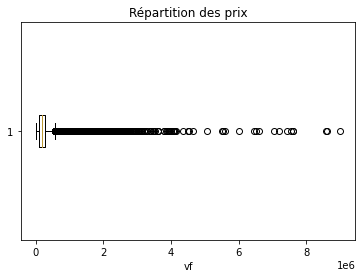

In [36]:
# boite a moustache 

plt.title('Répartition des prix')
plt.xlabel('vf')
plt.boxplot(vf['Valeurfonciere'], vert=False)
plt.show()

In [37]:
vf['Valeurfonciere'].kurtosis()

128.42669364340065

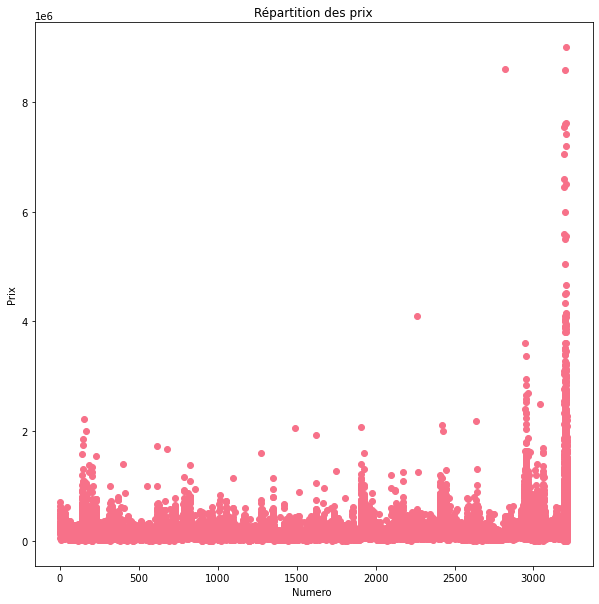

In [38]:
#  

plt.title('Répartition des prix')
plt.ylabel('Prix')
plt.xlabel('Numero ')

x=vf['CodeIDcommune']
y=vf['Valeurfonciere']
plt.scatter(x,y)
plt.gcf().set_size_inches(10, 10)

In [39]:
vf.dtypes

CodeIDcommune       int64
Valeurfonciere    float64
dtype: object

In [40]:
moy=round(vf['Valeurfonciere'].mean(),2)
med=round(vf['Valeurfonciere'].median(),2)

print('La moyenne des prix :',moy,'euros. La mediane est de:',med,'euros')

print('La médiane des prix est inferieur a la moyenne des prix')

La moyenne des prix : 252713.93 euros. La mediane est de: 169000.0 euros
La médiane des prix est inferieur a la moyenne des prix


In [41]:
df.columns

Index(['Nodisposition', 'Datemutation', 'Naturemutation', 'Valeurfonciere',
       'Novoie', 'Codetypedevoie', 'Typedevoie', 'Codevoie', 'Voie',
       'CodeIDcommune', 'Codepostal', 'Commune', 'Codedepartement',
       'Codecommune', 'Prefixedesection', 'Section', 'Noplan', 'Codetypelocal',
       'Typelocal', 'Surfacereellebati', 'Nombrepiecesprincipales',
       'Surfaceterrain'],
      dtype='object')

In [43]:
# def check_train(dataframe, head=5):
#     print("#####################describe####################")
#     print(dataframe.describe())
#     print("##################### Shape #####################")
#     print(dataframe.shape)
#     print("##################### Types #####################")
#     print(dataframe.dtypes)
#     print("##################### Head #####################")
#     print(dataframe.head(head))
#     print("##################### Tail #####################")
#     print(dataframe.tail(head))
#     print("##################### NA #####################")
#     print(dataframe.isnull().sum())
#     print("##################### Quantiles #####################")
#     print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
# check_train(immo)

In [44]:
# immo = immo.fillna(0)

In [45]:
# immo.dtypes

# Pourcentage des apartements et des maisons par codepostal

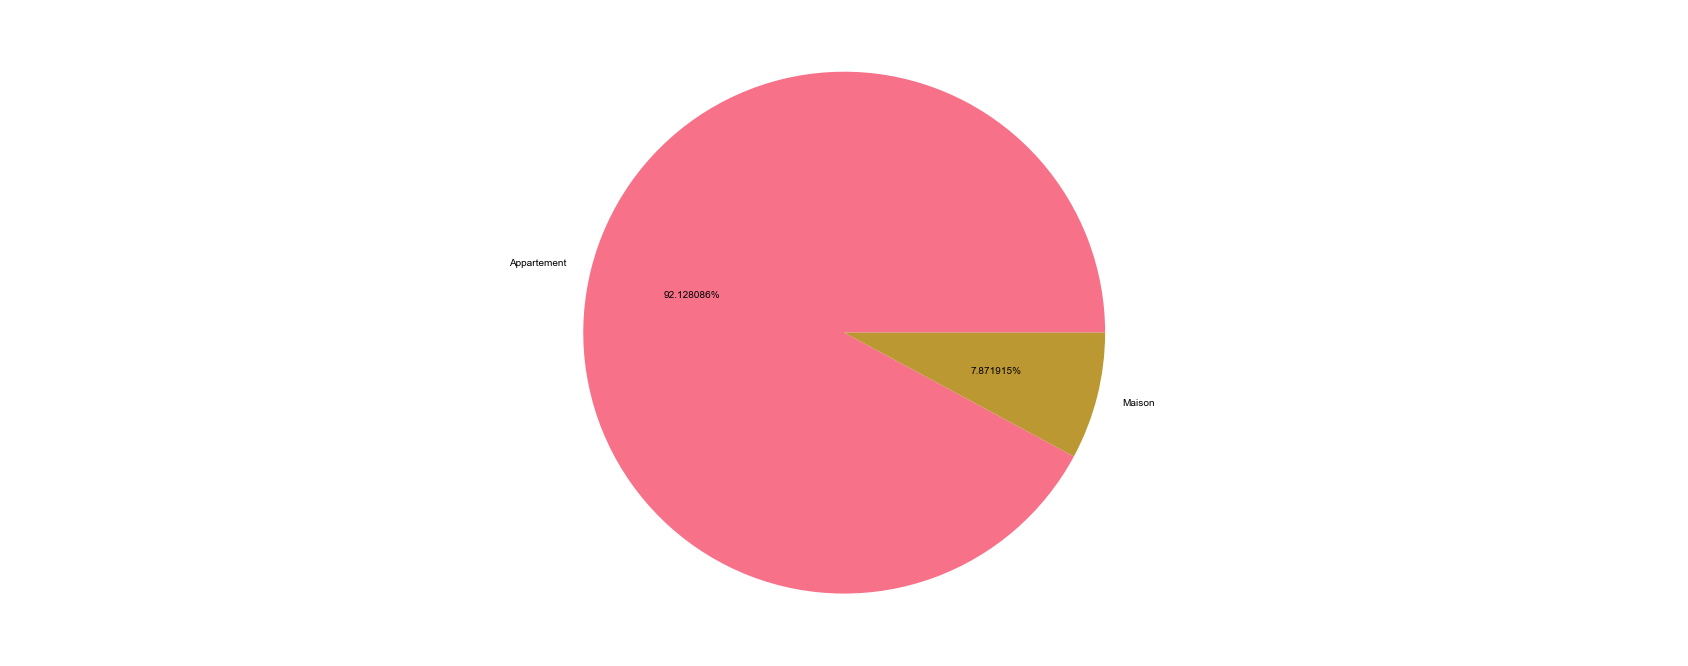

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
from matplotlib.pyplot import pie, axis, show
from matplotlib.pyplot import pie, axis, show
plt.figure(figsize=(20,10))
sums = df.groupby("Typelocal").sum()["Codepostal"]
axis('equal');
pie(sums, labels=sums.index,autopct = "%1f%%" );
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.set(font_scale = 2)
show()

In [47]:
# df5 = df5.sort_values("Commune", ascending = False).head(10)
# plt.figure(figsize = (30, 20))
# sns.barplot(x = df5["Codepostal"], y = df5["Commune"])
# plt.xlabel("Pays")
# plt.ylabel("DETAILLE(LES VALEUR FONCIERE)")
# sns.set(font_scale = 4)
# plt.show()

In [48]:
# top10_vie = df.sort_values("Literacy (%)", ascending = False).head(10)

# plt.figure(figsize = (20, 10))
# sns.pointplot(x = top10_vie["Country"], y = top10_vie["Birthrate"], color = "Blue", alpha = 0.8)
# sns.pointplot(x = top10_vie["Country"], y = top10_vie["Deathrate"], color = "red", alpha = 0.6)
# plt.text(1, 13, "Taux de naissance", color = "Blue", fontsize = 14)
# plt.text(1, 12.5, "Taux de mort", color = "red", fontsize = 14)
# plt.title("Taux de naissance et de mort dans le top 10 des pays alphabetes")
# plt.xlabel("Pays")
# plt.ylabel("Ratios (%)")
# sns.set(font_scale = 1)



# plt.grid()
# plt.show()


In [49]:
print(df.columns.values)
print(df.Commune.values)


['Nodisposition' 'Datemutation' 'Naturemutation' 'Valeurfonciere' 'Novoie'
 'Codetypedevoie' 'Typedevoie' 'Codevoie' 'Voie' 'CodeIDcommune'
 'Codepostal' 'Commune' 'Codedepartement' 'Codecommune' 'Prefixedesection'
 'Section' 'Noplan' 'Codetypelocal' 'Typelocal' 'Surfacereellebati'
 'Nombrepiecesprincipales' 'Surfaceterrain']
['SAINT-ETIENNE-DU-BOIS' 'CHEVRY' 'DIVONNE-LES-BAINS' ... 'PARIS 04'
 'PARIS 04' 'PARIS 02']


In [50]:
df2 = df[['Commune','CodeIDcommune']].groupby("Commune").sum()
df2.sort_values (by="CodeIDcommune",ascending=False).head (100)

CodeIDcommune
Commune                          
PARIS 18                  1656360
PARIS 17                  1508230
PARIS 15                  1305249
PARIS 16                  1263952
PARIS 11                  1226749
...                           ...
LYON 4EME                  146916
VILLEFRANCHE               146511
LIMEIL-BREVANNES           146400
EVRY-COURCOURONNES         144091
COLOMBES                   138650

[100 rows x 1 columns]

In [51]:
# import csv

# with open("valeursfoncieres-2020.txt") as f:
#     line = csv.reader(f, delimiter=',')

# line

In [52]:
# with open("valeursfoncieres-2020.txt", "r") as tf:
#     lines = tf.read().split(',')
    
# for line in lines:
#     print(line)

In [53]:
df21 = pd.read_csv("valeur2021test.csv")
# d= pd.read_csv("immo2.csv")
# d

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
df21

Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
0                    NaN                 NaN             NaN             NaN   
1                    NaN                 NaN             NaN             NaN   
2                    NaN                 NaN             NaN             NaN   
3                    NaN                 NaN             NaN             NaN   
4                    NaN                 NaN             NaN             NaN   
...                  ...                 ...             ...             ...   
1048570              NaN                 NaN             NaN             NaN   
1048571              NaN                 NaN             NaN             NaN   
1048572              NaN                 NaN             NaN             NaN   
1048573              NaN                 NaN             NaN             NaN   
1048574              NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
0                   NaN             NaN             NaN               1   
1                   NaN             NaN             NaN               1   
2                   NaN             NaN             NaN               1   
3                   NaN             NaN             NaN               1   
4                   NaN             NaN             NaN               1   
...                 ...             ...             ...             ...   
1048570             NaN             NaN             NaN               1   
1048571             NaN             NaN             NaN               1   
1048572             NaN             NaN             NaN               1   
1048573             NaN             NaN             NaN               1   
1048574             NaN             NaN             NaN               1   

        Date mutation                     Nature mutation  ...  \
0          05/01/2021                               Vente  ...   
1          05/01/2021                               Vente  ...   
2          06/01/2021                               Vente  ...   
3          04/01/2021                               Vente  ...   
4          06/01/2021                               Vente  ...   
...               ...                                 ...  ...   
1048570    14/06/2021                               Vente  ...   
1048571    16/06/2021  Vente en l'état futur d'achèvement  ...   
1048572    16/06/2021  Vente en l'état futur d'achèvement  ...   
1048573    30/06/2021  Vente en l'état futur d'achèvement  ...   
1048574    30/06/2021  Vente en l'état futur d'achèvement  ...   

         Surface Carrez du 5eme lot  Nombre de lots Code type local  \
0                               NaN               0             1.0   
1                               NaN               0             3.0   
2                               NaN               0             NaN   
3                               NaN               0             1.0   
4                               NaN               0             1.0   
...                             ...             ...             ...   
1048570                         NaN               2             2.0   
1048571                         NaN               1             NaN   
1048572                         NaN               1             NaN   
1048573                         NaN               1             NaN   
1048574                         NaN               1             NaN   

          Type local Identifiant local Surface reelle bati  \
0             Maison               NaN                97.0   
1         Dépendance               NaN                 0.0   
2                NaN               NaN                 NaN   
3             Maison               NaN                88.0   
4             Maison               NaN               168.0   
...              ...               ...                 ...   
1048570  Appartement               NaN                62.0   
10485

In [55]:
df21.columns = df21.columns.str.replace(' ', '') 


In [56]:
df21=df21.drop(['1ArticlesCGI','2ArticlesCGI','3ArticlesCGI','4ArticlesCGI','5ArticlesCGI','Prefixedesection','2emelot','SurfaceCarrezdu2emelot','3emelot','SurfaceCarrezdu3emelot', '4emelot','SurfaceCarrezdu4emelot','5emelot', 'SurfaceCarrezdu5emelot','Identifiantlocal','Natureculture', 'Natureculturespeciale','Surfaceterrain','CodeserviceCH','Referencedocument','NoVolume','B/T/Q'],1)

C:\Users\pc\AppData\Local\Temp/ipykernel_3112/2829906850.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df21=df21.drop(['1ArticlesCGI','2ArticlesCGI','3ArticlesCGI','4ArticlesCGI','5ArticlesCGI','Prefixedesection','2emelot','SurfaceCarrezdu2emelot','3emelot','SurfaceCarrezdu3emelot', '4emelot','SurfaceCarrezdu4emelot','5emelot', 'SurfaceCarrezdu5emelot','Identifiantlocal','Natureculture', 'Natureculturespeciale','Surfaceterrain','CodeserviceCH','Referencedocument','NoVolume','B/T/Q'],1)


In [57]:
# immo 21 final
df21

Nodisposition Datemutation                      Naturemutation  \
0                    1   05/01/2021                               Vente   
1                    1   05/01/2021                               Vente   
2                    1   06/01/2021                               Vente   
3                    1   04/01/2021                               Vente   
4                    1   06/01/2021                               Vente   
...                ...          ...                                 ...   
1048570              1   14/06/2021                               Vente   
1048571              1   16/06/2021  Vente en l'état futur d'achèvement   
1048572              1   16/06/2021  Vente en l'état futur d'achèvement   
1048573              1   30/06/2021  Vente en l'état futur d'achèvement   
1048574              1   30/06/2021  Vente en l'état futur d'achèvement   

         Valeurfonciere  Novoie Typedevoie Codevoie           Voie  \
0            18500000.0  5080.0        CHE     0471     DE VOGELAS   
1            18500000.0  5080.0        CHE     0471     DE VOGELAS   
2                1000.0     NaN        NaN     B043      ROUGEMONT   
3            20433200.0     7.0        ALL     0276  DES ECUREUILS   
4            32000000.0    87.0        RTE     0140    DE CERTINES   
...                 ...     ...        ...      ...            ...   
1048570      27000000.0  1154.0         AV     0082   DES PLATANES   
1048571      25900000.0  3320.0         BD     4215    PAUL VALERY   
1048572      25900000.0  3320.0         BD     4215    PAUL VALERY   
1048573      40400000.0     NaN        NaN     B063   LOUS COUTAUX   
1048574      40400000.0     NaN        NaN     B063   LOUS COUTAUX   

         Codepostal              Commune  ...  Codecommune  Section Noplan  \
0            1370.0        VAL-REVERMONT  ...          426       ZC    122   
1            1370.0        VAL-REVERMONT  ...          426       ZC    122   
2            1290.0                  BEY  ...           42        A    204   
3            1310.0              BUELLAS  ...           65        B   1325   
4            1250.0            MONTAGNAT  ...          254       AZ     11   
...             ...                  ...  ...          ...      ...    ...   
1048570     34970.0               LATTES  ...          129       CR    136   
1048571     34070.0          MONTPELLIER  ...          172       PB    340   
1048572     34070.0          MONTPELLIER  ...          172       PB    340   
1048573     34430.0  SAINT-JEAN-DE-VEDAS  ...          270       AW    322   
1048574     34430.0  SAINT-JEAN-DE-VEDAS  ...          270       AW    322   

         1erlot  SurfaceCarrezdu1erlot  Nombredelots  Codetypelocal  \
0           NaN                    NaN             0            1.0   
1           NaN                    NaN             0            3.0   
2           NaN                    NaN             0            NaN   
3           NaN                    NaN             0            1.0   
4           NaN                    NaN             0            1.0   
...         ...                    ...           ...            ...   
1048570    11.0                    NaN             2            2.0   
1048571    89.0                    NaN             1            NaN   
1048572     4.0                    NaN             1            NaN   
1048573   104.0                    NaN             1            NaN   
1048574    48.0                    NaN             1            NaN   

           Typelocal Surfacereellebati  Nombrepiecesprincipales  
0             Maison              97.0                      5.0  
1         Dépendance               0.0                      0.0  
2                NaN               NaN                      NaN  
3             Maison              88.0                      4.0  
4             Maison             168.0                      5.0  
...              ...               ...                      ...  
1048570  Appart

In [58]:
df21 = df21.fillna(0)

In [59]:
def check_train(dataframe, head=5):
    print("#####################describe####################")
    print(dataframe.describe())
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_train(df21)

#####################describe####################
       Nodisposition  Valeurfonciere        Novoie    Codepostal  \
count   1.048575e+06    1.048575e+06  1.048575e+06  1.048575e+06   
mean    2.080830e+00    3.797240e+07  4.952936e+02  1.953779e+04   
std     9.814492e+00    1.699680e+08  1.711699e+03  1.035833e+04   
min     1.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00   
25%     1.000000e+00    5.800000e+06  0.000000e+00  1.100000e+04   
50%     1.000000e+00    1.500000e+07  5.000000e+00  2.029000e+04   
75%     1.000000e+00    2.750000e+07  3.600000e+01  2.946000e+04   
max     1.980000e+02    1.020000e+10  9.999000e+03  4.825000e+04   

       Codedepartement   Codecommune        Noplan        1erlot  \
count     1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean      1.920167e+01  2.081407e+02  4.074181e+02  7.111177e+01   
std       1.038085e+01  1.647495e+02  5.344881e+02  9.250276e+02   
min       0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00 

https://datawrapper.dwcdn.net/LpBqF/2/
https://datawrapper.dwcdn.net/LpBqF/3/

# https://datawrapper.dwcdn.net/LpBqF/1/

# https://datawrapper.dwcdn.net/v2AC7/1/

In [60]:
# prop_etat_sous_nutrition['Zone'].unique()

In [61]:
df21["Codedepartement"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 21., 22., 23., 24., 25., 26., 27.,
       28., 29.,  0., 30., 31., 32., 33., 34.])

In [62]:
df["Codedepartement"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '16', '17', '18', '19', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '69', '70',
       '71', '72', '73', '74', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '971', '972', '973', '974', '75'], dtype=object)

In [63]:
df['Codedepartement'] = pd.to_numeric(df['Codedepartement'], errors='coerce')
df =df.replace(np.nan, 0, regex=True)

In [64]:
df["Codedepartement"].dtypes

dtype('float64')

In [65]:
df["Codedepartement"].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  16.,  17.,  18.,  19.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,   0.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  69.,  70.,
        71.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95., 971., 972., 973., 974.,  75.])

In [66]:
df['mois']=pd.DatetimeIndex(df['Datemutation']).month
df

Nodisposition Datemutation Naturemutation  Valeurfonciere  Novoie  \
0                  1   2020-02-03          Vente         56000.0   190.0   
1                  1   2020-01-02          Vente        165000.0   347.0   
2                  1   2020-01-08          Vente        720000.0    58.0   
3                  1   2020-01-06          Vente        429250.0   140.0   
4                  1   2020-01-07          Vente        220900.0    39.0   
...              ...          ...            ...             ...     ...   
34164              1   2020-06-30          Vente       1290000.0     4.0   
34165              1   2020-06-30          Vente        726000.0    38.0   
34166              1   2020-06-25          Vente        420000.0    13.0   
34167              1   2020-06-25          Vente        725000.0    16.0   
34168              1   2020-06-11          Vente        433000.0     3.0   

       Codetypedevoie Typedevoie Codevoie               Voie  CodeIDcommune  \
0                   0        RUE        5           CENTRALE              0   
1                   0        RUE       20         DU CHATEAU              1   
2                   1         AV      527      DU MONT BLANC              2   
3                   0        RUE        2  DE L'ABBE JOLIVET              3   
4                   0        RUE      110             BUFFON              4   
...               ...        ...      ...                ...            ...   
34164               0        RUE     8249          DE RIVOLI           3213   
34165               0        RUE     9191          DU TEMPLE           3213   
34166               0        RUE     9382     DES TOURNELLES           3213   
34167               0        RUE     1797        CHARLEMAGNE           3213   
34168               0        RUE     8659       SAINT-JOSEPH           3214   

       ...  Codecommune Prefixedesection  Section  Noplan  Codetypelocal  \
0      ...          350              0.0        B    1478              2   
1      ...          103              0.0        A     302              2   
2      ...          143              0.0       AK     563              2   
3      ...          288              0.0        C    2307              1   
4      ...           33              0.0       AE     440              2   
...    ...          ...              ...      ...     ...            ...   
34164  ...          104              0.0       AN       3              2   
34165  ...          104              0.0       AG      79              2   
34166  ...          104              0.0       AO      73              2   
34167  ...          104              0.0       AM      67              2   
34168  ...          102              0.0       AI      34              2   

         Typelocal  Surfacereellebati  Nombrepiecesprincipales Surfaceterrain  \
0      Appartement                 52                        2            0.0   
1      Appartement                 48                        3            0.0   
2      Appartement                130                        6            0.0   
3           Maison                109                        5            0.0   
4      Appartement                 91                        4            0.0   
...            ...                ...                      ...            ...   
34164  Appartement                 99                        3            0.0   
34165  Appartement                 56                        3            0.0   
34166  Appartement                 29                        2            0.0   
34167  Appartement                 48                        3            0.0   
34168  Appartement                 33                        1            0.0   

       mois  
0         2  
1         1  
2         1  
3         1  
4         1  
...     ...  
34164     6  
34165     6  
34166     6  
34167     6  
34168     6  

[34169 rows x 23 columns]

In [67]:
# month(immo['Datemutation'])
# dfm['month'] pd.
dfm = pd.DatetimeIndex(df['Datemutation']).month
dfm

Int64Index([2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            6, 5, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='Datemutation', length=34169)

In [68]:
df21['mois']=pd.DatetimeIndex(df21['Datemutation']).month
df21

Nodisposition Datemutation                      Naturemutation  \
0                    1   05/01/2021                               Vente   
1                    1   05/01/2021                               Vente   
2                    1   06/01/2021                               Vente   
3                    1   04/01/2021                               Vente   
4                    1   06/01/2021                               Vente   
...                ...          ...                                 ...   
1048570              1   14/06/2021                               Vente   
1048571              1   16/06/2021  Vente en l'état futur d'achèvement   
1048572              1   16/06/2021  Vente en l'état futur d'achèvement   
1048573              1   30/06/2021  Vente en l'état futur d'achèvement   
1048574              1   30/06/2021  Vente en l'état futur d'achèvement   

         Valeurfonciere  Novoie Typedevoie Codevoie           Voie  \
0            18500000.0  5080.0        CHE     0471     DE VOGELAS   
1            18500000.0  5080.0        CHE     0471     DE VOGELAS   
2                1000.0     0.0          0     B043      ROUGEMONT   
3            20433200.0     7.0        ALL     0276  DES ECUREUILS   
4            32000000.0    87.0        RTE     0140    DE CERTINES   
...                 ...     ...        ...      ...            ...   
1048570      27000000.0  1154.0         AV     0082   DES PLATANES   
1048571      25900000.0  3320.0         BD     4215    PAUL VALERY   
1048572      25900000.0  3320.0         BD     4215    PAUL VALERY   
1048573      40400000.0     0.0          0     B063   LOUS COUTAUX   
1048574      40400000.0     0.0          0     B063   LOUS COUTAUX   

         Codepostal              Commune  ...  Section  Noplan 1erlot  \
0            1370.0        VAL-REVERMONT  ...       ZC     122    0.0   
1            1370.0        VAL-REVERMONT  ...       ZC     122    0.0   
2            1290.0                  BEY  ...        A     204    0.0   
3            1310.0              BUELLAS  ...        B    1325    0.0   
4            1250.0            MONTAGNAT  ...       AZ      11    0.0   
...             ...                  ...  ...      ...     ...    ...   
1048570     34970.0               LATTES  ...       CR     136   11.0   
1048571     34070.0          MONTPELLIER  ...       PB     340   89.0   
1048572     34070.0          MONTPELLIER  ...       PB     340    4.0   
1048573     34430.0  SAINT-JEAN-DE-VEDAS  ...       AW     322  104.0   
1048574     34430.0  SAINT-JEAN-DE-VEDAS  ...       AW     322   48.0   

         SurfaceCarrezdu1erlot  Nombredelots  Codetypelocal    Typelocal  \
0                          0.0             0            1.0       Maison   
1                          0.0             0            3.0   Dépendance   
2                          0.0             0            0.0            0   
3                          0.0             0            1.0       Maison   
4                          0.0             0            1.0       Maison   
...                        ...           ...            ...          ...   
1048570                    0.0             2            2.0  Appartement   
1048571                    0.0             1            0.0            0   
1048572                    0.0             1            0.0            0   
1048573                    0.0             1            0.0            0   
1048574                    0.0             1            0.0            0   

         Surfacereellebati Nombrepiecesprincipales  mois  
0                     97.0                     5.0     5  
1                      0.0                     0.0     5  
2                      0.0                     0.0     6  
3                     88.0                     4.0     4  
4                    168.0                     5.0     6  
...                    ...                     ...   ...  
1048570               62.0                     3.0     6  
10485

In [69]:
sums =round( df.groupby("mois").mean()["Valeurfonciere"]).head(12)
sums

mois
1    257731.0
2    248776.0
3    265580.0
4    252288.0
5    250526.0
6    246540.0
Name: Valeurfonciere, dtype: float64

In [70]:
sums1 =round( df21.groupby("mois").mean()["Valeurfonciere"]).head(6)
sums1

mois
1    37019824.0
2    30180858.0
3    48230629.0
4    29046972.0
5    32839266.0
6    33556089.0
Name: Valeurfonciere, dtype: float64

In [71]:
# sums[sums["Codedepartement"]==15].drop(axis=1)
# sup=sums1.drop(sums1.loc[sums1['Codedepartement']==15.0].index, inplace=True)
# sup=sums1.drop(sums1.index==15.0, inplace=True)
# sums1.drop(15.0, inplace = True)

In [72]:
sums1

mois
1    37019824.0
2    30180858.0
3    48230629.0
4    29046972.0
5    32839266.0
6    33556089.0
Name: Valeurfonciere, dtype: float64

In [73]:
sums=pd.DataFrame(sums)

In [74]:
sums

Valeurfonciere
mois                
1           257731.0
2           248776.0
3           265580.0
4           252288.0
5           250526.0
6           246540.0

In [75]:
sums1=pd.DataFrame(sums1)
sums1

Valeurfonciere
mois                
1         37019824.0
2         30180858.0
3         48230629.0
4         29046972.0
5         32839266.0
6         33556089.0

In [76]:
# {dataframe = pd.DataFrame({'Age':[23, 17, 40, 38, 24, 12, 45], 
#                           'Avg Age in Family':[70, 65, 80, 55, 60, 63, 90]}, 
#                           index =['Olivia', 'John', 'Laura', 'Ben', 'Kevin',                                                'Robin','Elsa'])
# axis = dataframe.plot.bar(rot=0)
# print(axis)
# plt.show()

In [77]:
# data = pd.DataFrame(sums["Valeurfonciere"],sums1["Valeurfonciere"], index=sums.index)
# sums5= pd.DataFrame(columns=[sums["Valeurfonciere"],sums1["Valeurfonciere"]],index=sums.index)
# sums5
data= pd.merge(sums,sums1, on= "mois")
data

Valeurfonciere_x  Valeurfonciere_y
mois                                    
1             257731.0        37019824.0
2             248776.0        30180858.0
3             265580.0        48230629.0
4             252288.0        29046972.0
5             250526.0        32839266.0
6             246540.0        33556089.0

In [78]:
# df= pd.merge(sums,su1)
# df

In [79]:
# axis = data.plot.bar(rot=0)
# print(axis)
# plt.show()

In [80]:

# axis = data.plot.bar(rot=0, color=['r', 'b'])
# # print(axis)
# plt.figure(figsize=(100,100))
# plt.show()

In [81]:
# df_reset.plot(x="Codedepartement", y=["Valeurfonciere_x", "Valeurfonciere_y"], kind="bar") 

In [82]:
data.dtypes

Valeurfonciere_x    float64
Valeurfonciere_y    float64
dtype: object

In [83]:
df_reset=data.reset_index()
# df_reset=my_df.reset_index()

In [84]:
df_reset

mois  Valeurfonciere_x  Valeurfonciere_y
0     1          257731.0        37019824.0
1     2          248776.0        30180858.0
2     3          265580.0        48230629.0
3     4          252288.0        29046972.0
4     5          250526.0        32839266.0
5     6          246540.0        33556089.0

In [85]:
# plt.figure(figsize=(10,10))
# # immo = [ 'Maison', 'Appartement']
# colors = ['#ff9999','#66b3ff','#99ff99']
# area = [41, 21.4, 18, 12.9, 0.37]
# #area = [91.93, 6.88, 0.82, 0.28,0.056]
# explode = (0.05,0.05,0.1,0.1,0.1)
# plt.pie(area, data=immo["Typelocal"], explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
# plt.title(label= 'Répartition de la variable type_local')
# plt.legend()
# plt.show()
# immo[''].value_counts(dropna = False, normalize = True).head()
# import scipy
# from scipy.stats import norm
# y = np.log(immo['Valeurfonciere'])
# sns.distplot(y, fit=norm);
# fig = plt.figure()

In [86]:
# data = pd.concat([immo['Valeurfonciere'], immo['Codedepartement']], axis=1).head(10)
# f, ax = plt.subplots(figsize=(10, 10))
# fig = sns.boxplot(x=immo['Codedepartement'], y=immo['Valeurfonciere'], data=data)
# fig.axis(ymin=0, ymax=65000000);

In [87]:
import plotly.express as px
nature = df_reset.groupby('mois')['Valeurfonciere_x'].mean().reset_index().sort_values('Valeurfonciere_x',ascending = False).head(20)
nature = nature.rename(columns = {'Valeurfonciere_x':'moyenne'})
fig = px.bar(nature, x='mois', y='moyenne', color='moyenne')
fig.show()

In [88]:
df_reset

mois  Valeurfonciere_x  Valeurfonciere_y
0     1          257731.0        37019824.0
1     2          248776.0        30180858.0
2     3          265580.0        48230629.0
3     4          252288.0        29046972.0
4     5          250526.0        32839266.0
5     6          246540.0        33556089.0

In [89]:
# df= pd.merge(df_reset,im)
# df

<AxesSubplot:>

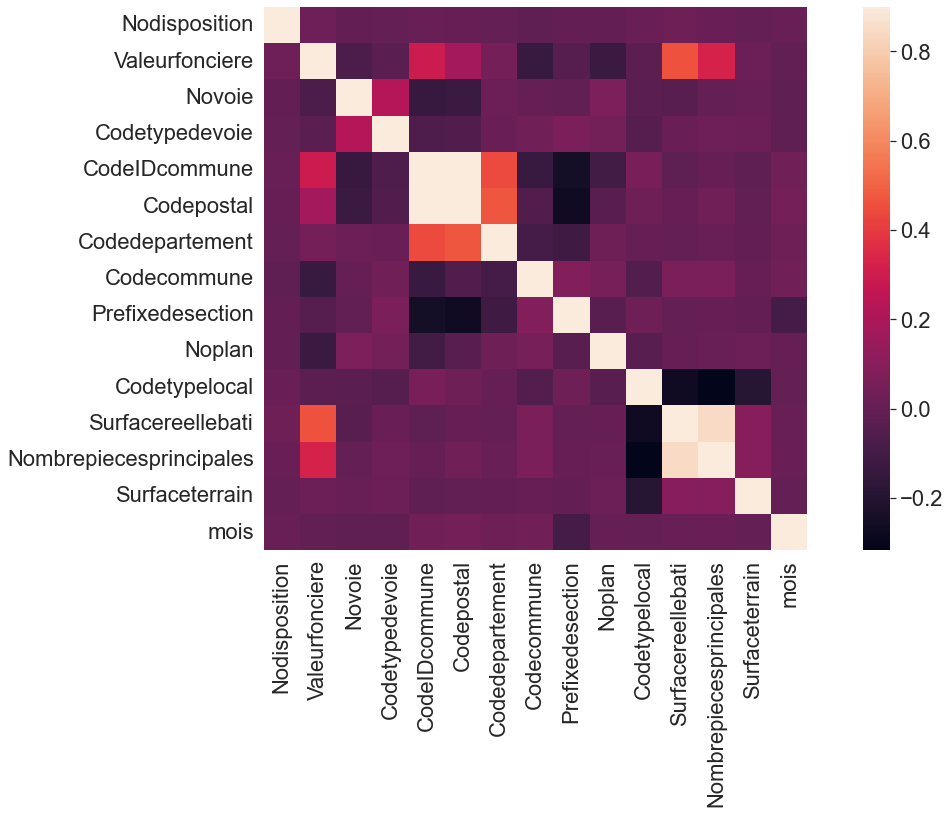

In [90]:
# dff = temp_df #Before Imputation Dataset

corrmat = df.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True)

Analyse brivement:
La base DVF enregistre les données des transactions immobilières de tous les communes en frances métropoles (hors Alsace et Moselle) ainsi que les département d'Outre-Mer (hors Mayotte).
À partir de ce jeux de données, nous pourons faire des analyses pour la valeur foncières en france selon différentes critères (typologie de biens, la nature de mutation,créer des outils cartographique interactive avec la valeur foncière par chaque communes et par le département (par exemple, comme les outils cartographiques que MeilleursAgents a utilisé, nous pourrons faire la carte de prix par m² des bureaux/commerces/entrepôts par communes en France).
Nous pourrons savoir aussi à partir de ce jeu de données l'évoution selon le temps ( entre 2014 et 2020 ) pour chaque type de biens.
Le point faible de ce jeu, c'est qu'il n'y a pas mal des informations manquantes (comme les caractéristiques du bien, le nombre d'étage, ascenseur, année de construction ...) qui nous permet de faire une estimation la valeur du bien en utilisant la méthode hédonique et en prendre en compte l'impacte de la localisation spatial du bien.
De plus,le jeu de données contient aussi beaucoup des données manquants.

# code_departement & Surfacereellebati

In [91]:
nature = df.groupby('Codedepartement')['Surfacereellebati'].sum().reset_index().sort_values('Surfacereellebati',ascending = False).head(20)
nature = nature.rename(columns = {'Surfacereellebati':'sum'})
fig = px.bar(nature, x='Codedepartement', y='sum', color='sum')
fig.show()


In [92]:
#Répartition de la nature de mutation du bien!
df21['Naturemutation'].value_counts(dropna = False, normalize = True).head()

Vente                                 0.940747
Vente en l'état futur d'achèvement    0.043825
Echange                               0.011200
Vente terrain à bâtir                 0.002086
Adjudication                          0.002037
Name: Naturemutation, dtype: float64

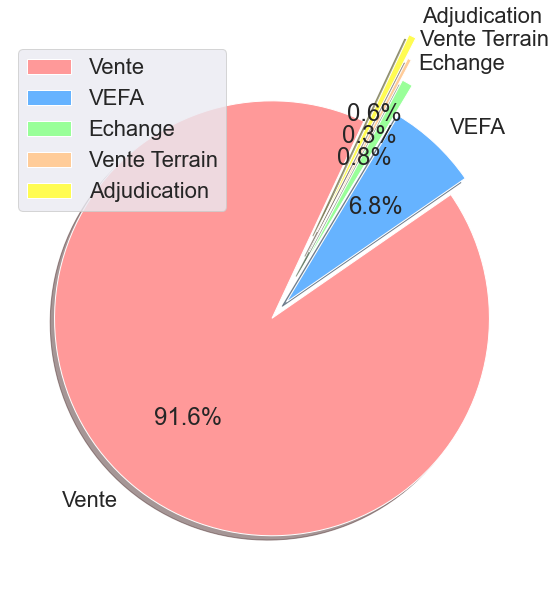

In [93]:
# Visualiser la répartition de la nature de mutation
plt.figure(figsize=(10,10))
labels = ['Vente', 'VEFA', 'Echange', 'Vente Terrain', 'Adjudication']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
area = [92, 6.8, 0.82, 0.28, 0.56]
#area = [91.93, 6.88, 0.82, 0.28,0.056]
explode = (0.05,0.05,0.2,0.3,0.4)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.legend()
plt.show()

Ici, nous trouvons que 91% les tranctions immobilières en 2020 pour tous les régions en France sont les ventes immobilières. La vente en VEFA est juste 6.8% et les restes sont moins de 2% pour les autres types de transactions. Du coup, nous serons travailler sur la Vente dans ce jeu de données (en excluant tous les autres types de transactions).

In [94]:
#3) Filtrer les données pour avoir une base qui contient que les données pour la local commercial, industriel et assimilé
df21 = df21[(df21["Naturemutation"] == 'Vente')  &  (df21["Codetypelocal"] == 4)]
df21

Nodisposition Datemutation Naturemutation  Valeurfonciere  Novoie  \
81                   1   06/01/2021          Vente      15800000.0   149.0   
126                  1   15/01/2021          Vente       6800000.0   118.0   
344                  1   06/01/2021          Vente       7000000.0    30.0   
506                  2   21/01/2021          Vente      21000000.0    30.0   
509                  2   21/01/2021          Vente      21000000.0    30.0   
...                ...          ...            ...             ...     ...   
1048430              1   30/04/2021          Vente      33000000.0   142.0   
1048454              1   15/06/2021          Vente      15500000.0   467.0   
1048519              1   23/06/2021          Vente      19500000.0   462.0   
1048520              1   23/06/2021          Vente      19500000.0   462.0   
1048536              1   22/06/2021          Vente      34250000.0     7.0   

        Typedevoie Codevoie                Voie  Codepostal  \
81             RUE     0275   DES GRANDS CHAMPS      1250.0   
126             PL     0082          DU FOURNIL      1340.0   
344             PL     0420       MICHEL POISAT      1190.0   
506             GR     0055          GRANDE RUE      1340.0   
509             GR     0055          GRANDE RUE      1340.0   
...            ...      ...                 ...         ...   
1048430         AV     5518         DE TOULOUSE     34070.0   
1048454        RUE     4955  DE LA ROQUETURIERE     34090.0   
1048519         AV     0406         DE L'EUROPE     34170.0   
1048520         AV     0406         DE L'EUROPE     34170.0   
1048536        RUE     3245               LEVAT     34000.0   

                      Commune  ...  Section  Noplan 1erlot  \
81       HAUTECOURT-ROMANECHE  ...       AO     361    0.0   
126                  FOISSIAT  ...       AB     554    0.0   
344              PONT-DE-VAUX  ...       AE     266    0.0   
506       MONTREVEL-EN-BRESSE  ...       AC     192    0.0   
509       MONTREVEL-EN-BRESSE  ...       AC     192    0.0   
...                       ...  ...      ...     ...    ...   
1048430           MONTPELLIER  ...       IM      75    0.0   
1048454           MONTPELLIER  ...       BK     112    6.0   
1048519      CASTELNAU LE LEZ  ...       AY     200    2.0   
1048520      CASTELNAU LE LEZ  ...       AY     200    2.0   
1048536           MONTPELLIER  ...       EW     305    1.0   

         SurfaceCarrezdu1erlot  Nombredelots  Codetypelocal  \
81                         0.0             0            4.0   
126                        0.0             0            4.0   
344                        0.0             0            4.0   
506                        0.0             0            4.0   
509                        0.0             0            4.0   
...                        ...           ...            ...   
1048430                    0.0             0            4.0   
1048454                 4754.0             1            4.0   
1048519                    0.0             1            4.0   
1048520                    0.0             1            4.0   
1048536                    0.0             3            4.0   

                                        Typelocal  Surfacereellebati  \
81       Local industriel. commercial ou assimilé               63.0   
126      Local industriel. commercial ou assimilé              100.0   
344      Local industriel. commercial ou assimilé              180.0   
506      Local industriel. commercial ou assimilé              106.0   
509      Local industriel. commercial ou assimilé               91.0   
...                                           ...                ...   
1048430  Local industriel. commercial ou assimilé               95.0   
1048454  Local industriel. commercial ou assimilé               51.0   
1048519  Local industriel. commercial ou assimilé               53.0   
1048520  Local industriel. commercial ou assimilé               53.0   
1048536  Local indust

In [95]:
 #Vérifier le nombre des variables quantitatives et qualitatives dans notre jeu de donnée
num_vars = df21.dtypes[df21.dtypes != "object"].index
cat_vars = df21.dtypes[df21.dtypes == "object"].index

print("Nombres des variables quantitatives: ", len(num_vars))
print("Nombres des variables qualitatives: ", len(cat_vars))
 df21.dtypes

Nombres des variables quantitatives:  14
Nombres des variables qualitatives:  8


Nodisposition                int64
Datemutation                object
Naturemutation              object
Valeurfonciere             float64
Novoie                     float64
Typedevoie                  object
Codevoie                    object
Voie                        object
Codepostal                 float64
Commune                     object
Codedepartement            float64
Codecommune                  int64
Section                     object
Noplan                       int64
1erlot                     float64
SurfaceCarrezdu1erlot      float64
Nombredelots                 int64
Codetypelocal              float64
Typelocal                   object
Surfacereellebati          float64
Nombrepiecesprincipales    float64
mois                         int64
dtype: object

C:\Users\pc\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



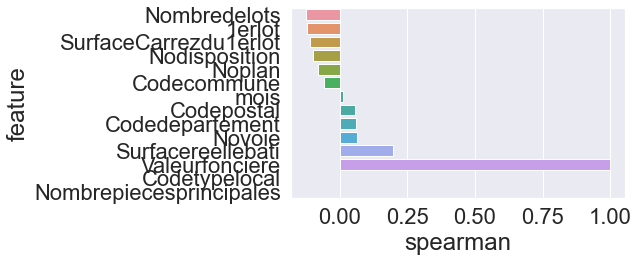

In [96]:
#Créer une fonction pour calculer la corrélation entre les variables quantitatives
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Valeurfonciere'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = num_vars
spearman(df21, features)
#Pour analyser la corrélation entre les variables dans notre jeu de données,
# nous utlisons la test spearman et pearson pour savoir la rélation entre les variables quantitatives.
# Ici, nous trouvons que la valeur foncière est corrélé possitivement avec la surface du terrain et
# la surface reelle du bâtiment. C'est à dire plus la surface est grande, plus la valeur est cher!

<AxesSubplot:>

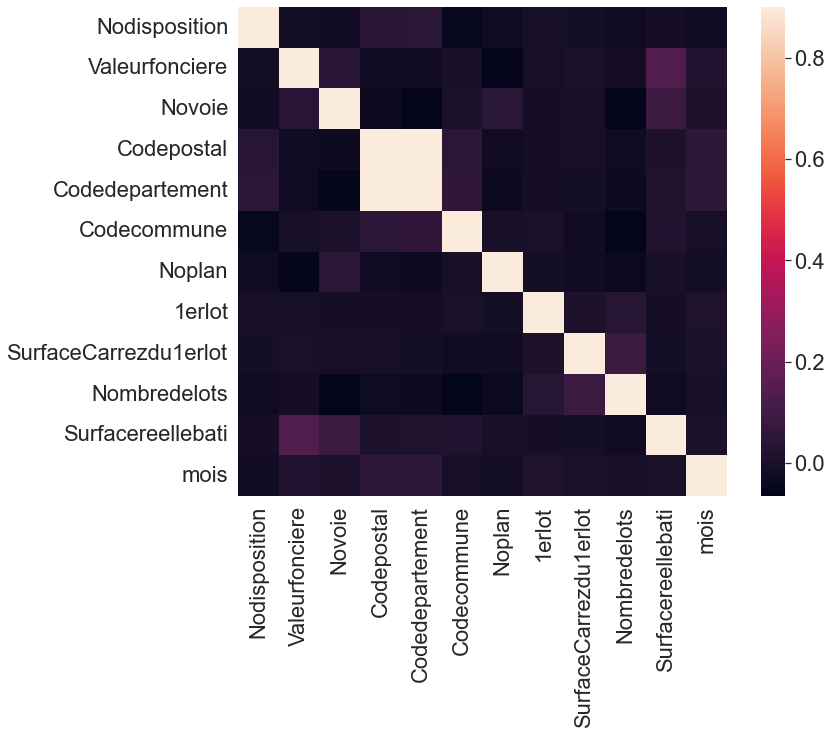

In [97]:
#Matrice de corrélation entre les variables (heatmap)
corrmat = df21.drop(columns=['Codetypelocal','Nombrepiecesprincipales']).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

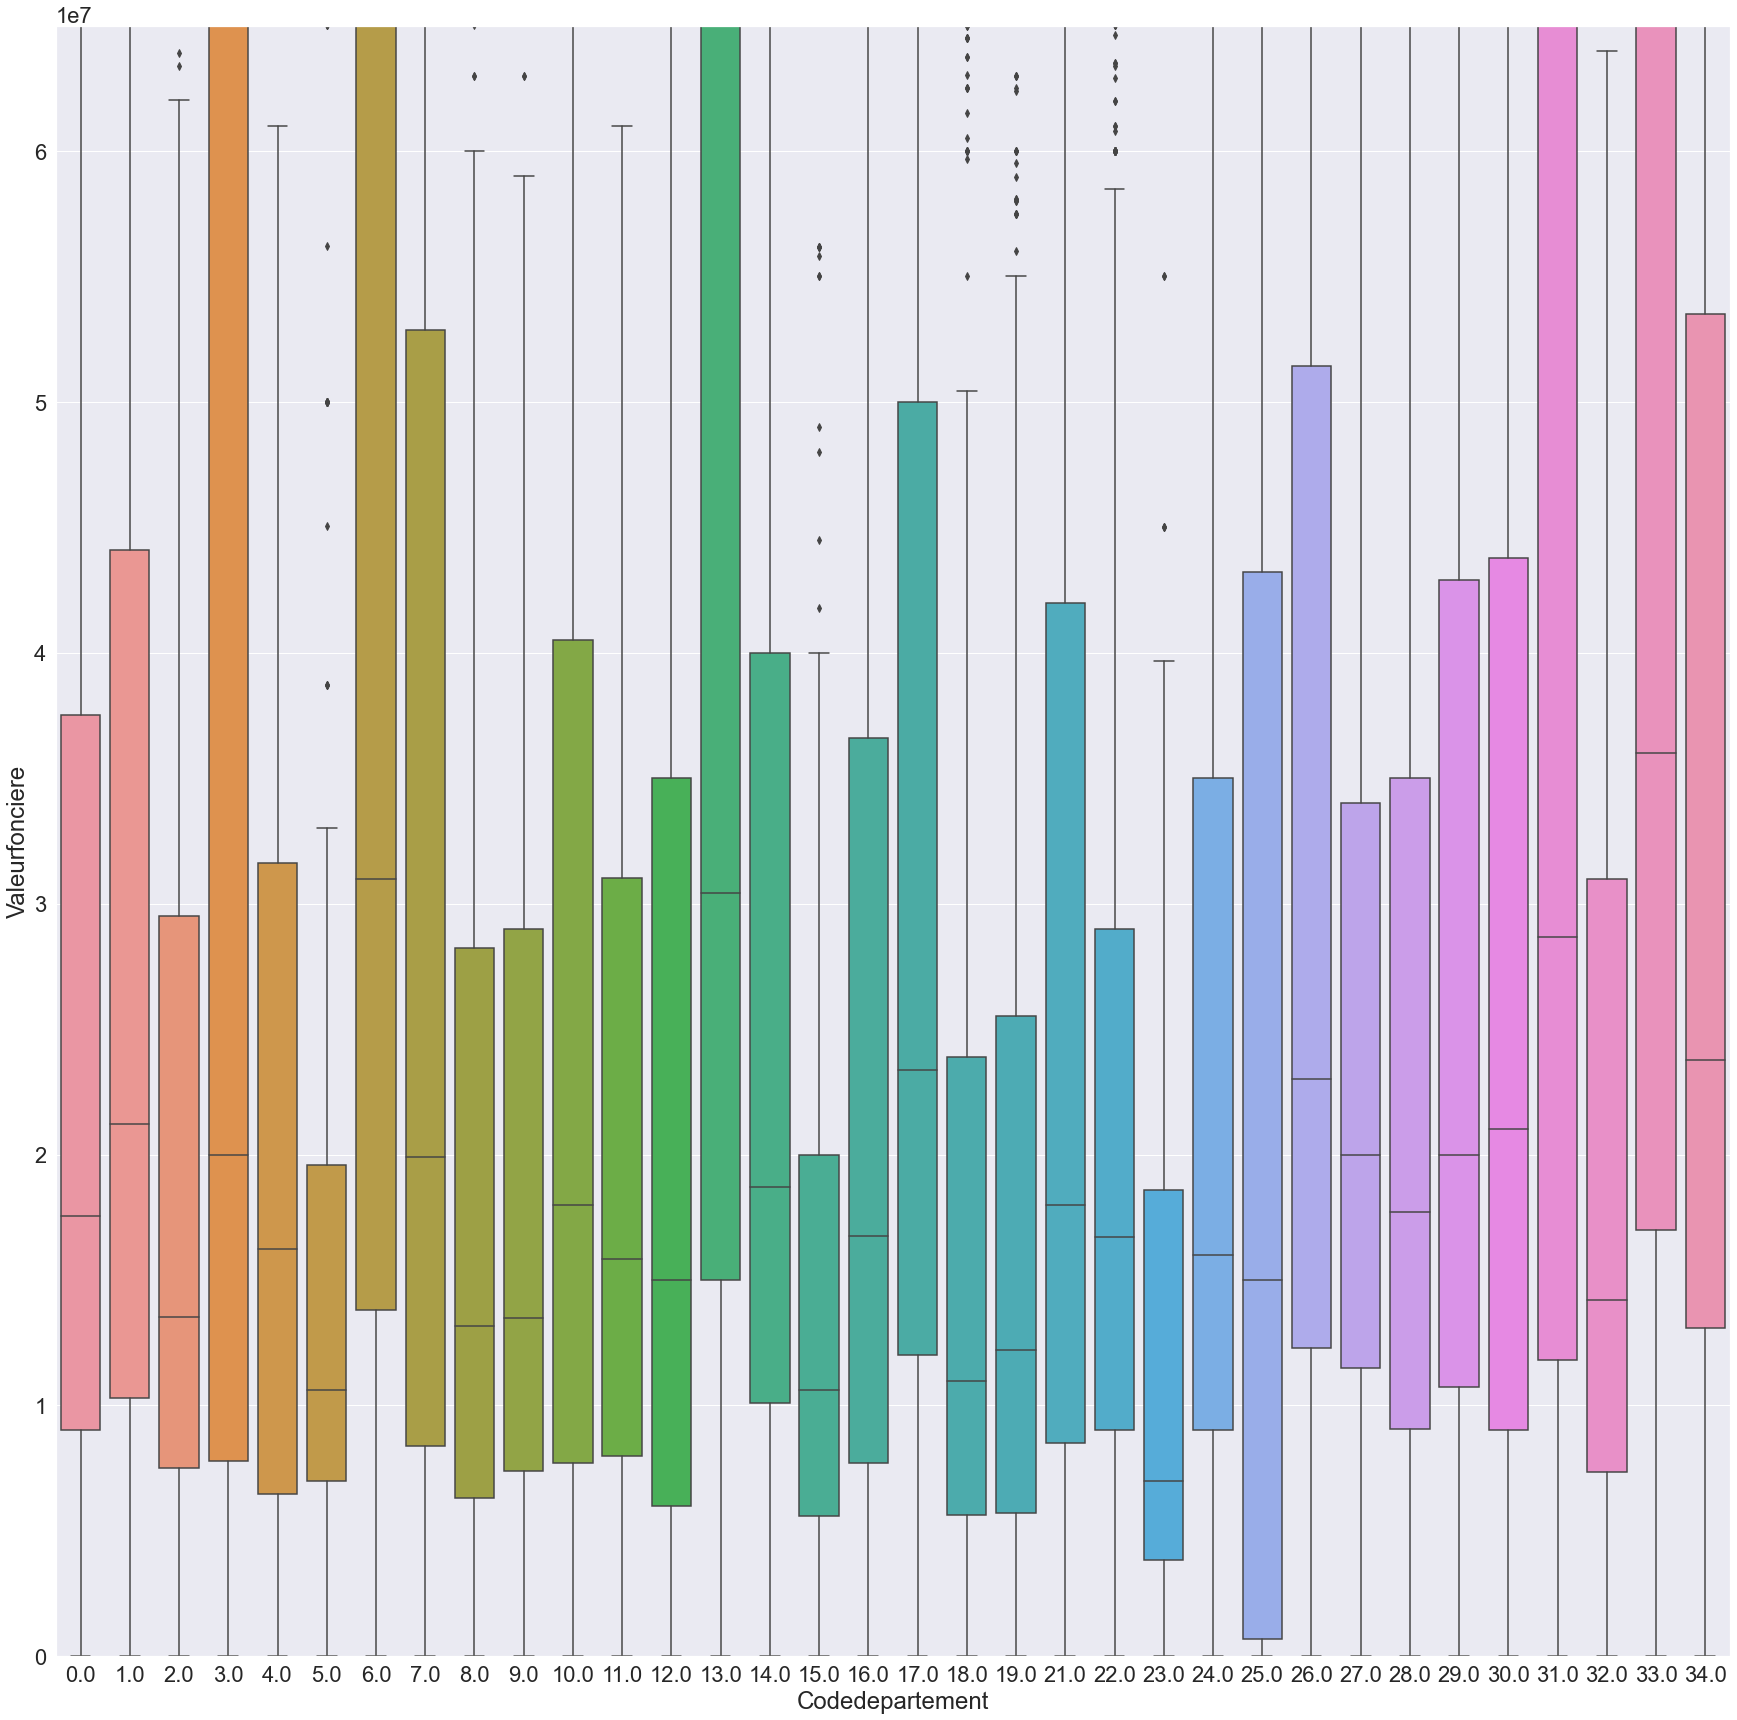

In [98]:
# Pour étudier la corrélation entre une variable quantitative et une variable qualitative, 
# nous pouvons utiliser le box-plot pour voir la rélation entre eux. 
# Ici, j'étudie la relation entre le valeur foncière et le code_departement.
# L'idée est pour voir si la localisation géographique du bien a une impact sur le prix de transaction immobilière. 
# Les commentaires se trouvent en dessous du graph.
#Box Plot
data = pd.concat([df21['Valeurfonciere'], df21['Codedepartement']], axis=1)
f, ax = plt.subplots(figsize=(30, 30))
fig = sns.boxplot(x=df21['Codedepartement'], y=df21['Valeurfonciere'], data=data)
fig.axis(ymin=0, ymax=65000000);

Grâce à ce graphique, je vois que la valeur foncière est forte corrélé avec la localisation du bien. Par exemple,
pour les déparments dans la régions Ile-de-France, on voit la différent très claire par rapport les autres départements. Les biens dans ces départements a été vendu plus chers par rapport les autres régions de la France. On peut conclure que, pour les prix immobilière en France, la régions Ile-de-France est un cas spécialisé en terme de prix, et la volume de transaction!

Pour les autres départments en France, on trouve que les département Alpes-maritimes - Nice, Bouches-du-Rhône - Marseille, Haute-garonne - Toulouse, Loire-atlantique - Nantes, Nord - Lille, Gironde - Bordeaux, Rhône - Lyon, les prix sont toujours plus haut que les autres régions de la France (sauf Ile-de-France).

Cela est compréhensible, parce que ce sont les plus grands métropoles françaises ou les marché immobiliers sont tendu. Par exemple pour le marché des bureaux, lyon prend la 2 ème position juste après le Grand Paris!

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Skewness: 10.543921
Kurtosis: 167.105388


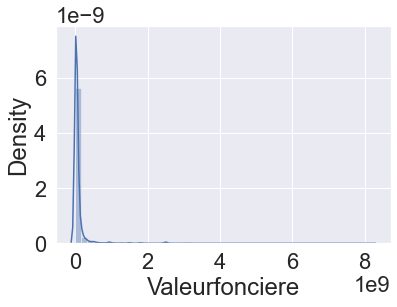

In [99]:
import scipy.stats as st
sns.distplot(df21['Valeurfonciere'])

print("Skewness: %f" % df21['Valeurfonciere'].skew())
print("Kurtosis: %f" % df21['Valeurfonciere'].kurt())

On voit ici que la distribution de la valeur fonciere est sysmétrie positivement. Cela indique une distribution décalée à gauche de la médiane, et donc une queue de distribution étalée vers la droite. Dans les études de prix immobilier (notament pour la modélisation et l'estimation prix immobilière), normalement nous transformons le prix en logarithme (log_normale) et de plus, on va s'intéresser au prix par m2 plutôt que le prix total d'une transaction.

Par ailleurs, on trouves que le type de bien ici sont redondances (il comprend les bureaux, les commerces, les entrepôt) dont cela donne des valeurs foncieres très hétérogènes!

In [100]:
# #Ici, nous transformons la valeur fonciere en log pour voir la distribution de cette variable: 
# import scipy
# from scipy.stats import norm
# y = np.log(df0['Valeurfonciere'])
# sns.distplot(y, fit=norm);
# fig = plt.figure()

3) Pour la classification les bureaux, commerces et entrepots à partir de la variable type_local je vois que:
Avec seulements les données disponibles dans ce jeu de données, pour classfier les types des bâtiments nous pourrons utiliser certaines méthodes comme la K-Nearest Neighboor ou le Clustering mais personnellement, je trouves que les résultats ne seronts pas signigicatives vu que nous n'avons pas beaucoup des informations concernant les caractéristiques du bien pour faire la classification.
De l'autre côté, pour chaque bien on a les données géolocalisée (variables coordinates), c'est une information très important. À partir de la variable cordinnates, nous pouvons trouver les images "street view" pour chaque bâtiment avec l'API Google Street View Static. Et puis, nous pouvons collecter tous les images "façade" de chaque bâtiments et créer une dataset contient ques les images.
Avec ce dataset, nous pouvons faire ensuite une modèle Réseaux Neuronal Convolutif pour faire la classification des bâtiments à partir de ces images (Il existe aussi d'autres techniques classification comme la SVM, RandomForest Classifier, Regression Logistique Multinomial, etc.).
Mais vu que l'API de google n'est pas gratuit pour collecter les images. Donc, j'ai essayé de faire une exemple en collectant une base des images qui contients ques les photos de façades pour les batiments en Etats-Unis. Ce dataset contient 6600 images (en trois classe: industrial, office building, retail) pour les données apprentisage et 845 images pour la validation (3 class: industrial, office building, retail).
Ce jeux de données, je considère comme une proposition pour trouver la méthodologie pour la classification des bâtiments. C'est pour cette raison, la partie de la construction du modèle Machine Learning s'est mis dans la deuxième jupyter notebook qui s'appelle Classification bâtiments.

# IMMO 2020 on a que la vente

In [101]:
#Répartition de la nature de mutation du bien!
df['Naturemutation'].value_counts(dropna = False, normalize = True).head()

Vente    1.0
Name: Naturemutation, dtype: float64

In [102]:
#  #3) Filtrer les données pour avoir une base qui contient que les données pour la local commercial, industriel et assimilé
# df = df[(df["Naturemutation"] == 'Vente')  &  (df["Codetypelocal"] == 4)]
# df

In [103]:
#  #Vérifier le nombre des variables quantitatives et qualitatives dans notre jeu de donnée
# num_vars = immo.dtypes[immo.dtypes != "object"].index
# cat_vars = immo.dtypes[immo.dtypes == "object"].index

# print("Nombres des variables quantitatives: ", len(num_vars))
# print("Nombres des variables qualitatives: ", len(cat_vars))
# # df0.dtypes

In [104]:
# #Créer une fonction pour calculer la corrélation entre les variables quantitatives
# def spearman(frame, features):
#     spr = pd.DataFrame()
#     spr['feature'] = features
#     spr['spearman'] = [frame[f].corr(frame['Valeurfonciere'], 'spearman') for f in features]
#     spr = spr.sort_values('spearman')
#     plt.figure(figsize=(6, 0.25*len(features)))
#     sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
# features = num_vars
# spearman(immo, features)

In [105]:
df2

CodeIDcommune
Commune                        
ABBEVILLE                 28061
ABLON-SUR-SEINE           54936
ABRIES-RISTOLAS             123
ACHERES                   46664
ACHERES-LA-FORET           2307
...                         ...
YSSINGEAUX                 1274
YVETOT                    29237
YVRAC                       846
YZEURE                      296
ZONZA                      6200

[3110 rows x 1 columns]

In [106]:
# #Matrice de corrélation entre les variables (heatmap)
# corrmat = df.corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

In [107]:
# #Box Plot
# data = pd.concat([df['Valeurfonciere'], df['Codedepartement']], axis=1).head(10)
# f, ax = plt.subplots(figsize=(20, 200))
# fig = sns.boxplot(x=df['Codedepartement'], y=df['Valeurfonciere'], data=data)
# fig.axis(ymin=0, ymax=65000000);

In [108]:
#3) Filtrer les données pour avoir une base qui contient que les données pour la local commercial, industriel et assimilé
df1 = df[(df["Naturemutation"] == 'Vente')  &  (df21["Codetypelocal"] == 4)]
df1

C:\Users\pc\AppData\Local\Temp/ipykernel_3112/2866994800.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Nodisposition Datemutation Naturemutation  Valeurfonciere  Novoie  \
81                 1   2020-02-17          Vente        506000.0   103.0   
126                1   2020-04-08          Vente        445000.0    48.0   
344                1   2020-02-06          Vente         52300.0     0.0   
506                1   2020-05-18          Vente         36100.0  5216.0   
509                1   2020-05-29          Vente        148000.0  5336.0   
...              ...          ...            ...             ...     ...   
33942              1   2020-01-24          Vente       1495000.0   133.0   
34061              1   2020-05-11          Vente        123500.0   273.0   
34080              1   2020-03-09          Vente       1480000.0    46.0   
34096              1   2020-05-19          Vente        556000.0     7.0   
34098              1   2020-05-29          Vente       1160000.0    17.0   

       Codetypedevoie Typedevoie Codevoie                  Voie  \
81                  9       MAIL       77           DU NEUTRINO   
126                 0        RUE      155             DE GENEVE   
344                18        RES     A029  LES MARMOTTES BLEUES   
506                 8          0     B021         FONTAINEBLEAU   
509                 8          0     B202              MERLETTE   
...               ...        ...      ...                   ...   
33942               0        RUE     8490         SAINT ANTOINE   
34061               0        RUE     8525           SAINT DENIS   
34080              24       QUAI     4586              HENRI IV   
34096               0        RUE     5820            DE LOUVOIS   
34098               0        RUE     7346   DES PETITS CARREAUX   

       CodeIDcommune  ...  Codecommune Prefixedesection  Section  Noplan  \
81                20  ...          313              0.0       AP      75   
126               13  ...          160              0.0       AO      45   
344               98  ...          226              0.0       AC      85   
506              128  ...          166              0.0       AA     205   
509              117  ...           96              0.0       AC      68   
...              ...  ...          ...              ...      ...     ...   
33942           3213  ...          104              0.0       AM      76   
34061           3214  ...          102              0.0       AP     117   
34080           3213  ...          104              0.0       AT      11   
34096           3214  ...          102              0.0       AF      97   
34098           3214  ...          102              0.0       AJ      82   

       Codetypelocal    Typelocal  Surfacereellebati  Nombrepiecesprincipales  \
81                 1       Maison                110                        5   
126                2  Appartement                115                        4   
344                2  Appartement                 29                        2   
506                2  Appartement                 37                        2   
509                2  Appartement                 69                        2   
...              ...          ...                ...                      ...   
33942              2  Appartement                115                        4   
34061              2  Appartement                 10                        1   
34080              2  Appartement                 93                        5   
34096              2  Appartement                 40                        3   
34098              2  Appartement                 86                        4   

      Surfaceterrain  mois  
81               0.0     2  
126              0.0     4  
344              0.0     2  
506              0.0     5  
509              0.0     5  
...              ...   ...  
33942            0.0     1  
34061            0.0     5  
34080            0.0     3  
34096            0.0     5  
34098            0.0     5  

[843 rows x 23 columns]

In [109]:
 #Vérifier le nombre des variables quantitatives et qualitatives dans notre jeu de donnée
num_vars = df.dtypes[df.dtypes != "object"].index
cat_vars = df.dtypes[df.dtypes == "object"].index

print("Nombres des variables quantitatives: ", len(num_vars))
print("Nombres des variables qualitatives: ", len(cat_vars))
# df0.dtypes

Nombres des variables quantitatives:  16
Nombres des variables qualitatives:  7


In [110]:
df3 = df[(df["Codedepartement"] < 95)  &  (df["Codedepartement"] > 72)]
df3

Nodisposition Datemutation Naturemutation  Valeurfonciere  Novoie  \
15714              1   2020-01-16          Vente        241580.0    35.0   
15715              1   2020-01-13          Vente         55000.0     6.0   
15716              1   2020-01-15          Vente         24500.0  5587.0   
15717              1   2020-01-09          Vente         78000.0  5661.0   
15718              1   2020-01-13          Vente        126600.0   647.0   
...              ...          ...            ...             ...     ...   
34164              1   2020-06-30          Vente       1290000.0     4.0   
34165              1   2020-06-30          Vente        726000.0    38.0   
34166              1   2020-06-25          Vente        420000.0    13.0   
34167              1   2020-06-25          Vente        725000.0    16.0   
34168              1   2020-06-11          Vente        433000.0     3.0   

       Codetypedevoie Typedevoie Codevoie                Voie  CodeIDcommune  \
15714               0        RUE     2250            VAUGELAS           2084   
15715              15         BD     1920  DE LA ROCHE DU ROI           2084   
15716               8          0     A360       IMM LE SIKKIM           2085   
15717               8          0     A120   IMM LES GENTIANES           2085   
15718               3        RTE       50         NATIONALE 6           2086   
...               ...        ...      ...                 ...            ...   
34164               0        RUE     8249           DE RIVOLI           3213   
34165               0        RUE     9191           DU TEMPLE           3213   
34166               0        RUE     9382      DES TOURNELLES           3213   
34167               0        RUE     1797         CHARLEMAGNE           3213   
34168               0        RUE     8659        SAINT-JOSEPH           3214   

       ...  Codecommune Prefixedesection  Section  Noplan  Codetypelocal  \
15714  ...            8              0.0       CD     922              2   
15715  ...            8              0.0       AR      17              2   
15716  ...          150              0.0        N    1746              2   
15717  ...          150              0.0        N     887              2   
15718  ...          249              0.0       AD      80              2   
...    ...          ...              ...      ...     ...            ...   
34164  ...          104              0.0       AN       3              2   
34165  ...          104              0.0       AG      79              2   
34166  ...          104              0.0       AO      73              2   
34167  ...          104              0.0       AM      67              2   
34168  ...          102              0.0       AI      34              2   

         Typelocal  Surfacereellebati  Nombrepiecesprincipales Surfaceterrain  \
15714  Appartement                 46                        2            0.0   
15715  Appartement                 29                        1            0.0   
15716  Appartement                 14                        1            0.0   
15717  Appartement                 22                        1            0.0   
15718  Appartement                 35                        1            0.0   
...            ...                ...                      ...            ...   
34164  Appartement                 99                        3            0.0   
34165  Appartement                 56                        3            0.0   
34166  Appartement                 29                        2            0.0   
34167  Appartement                 48                        3            0.0   
34168  Appartement                 33                        1            0.0   

       mois  
15714     1  
15715     1  
15716     1  
15717     1  
15718     1  
...     ...  
34164     6  
34165     6  
34166     6  
34167     6  
34168     6  

[17047 rows x 23 columns]

In [111]:
# median_value = np.percentile(immo, 50) 
# print(median_value) 

In [112]:
data

Valeurfonciere  Codedepartement
81           15800000.0              1.0
126           6800000.0              1.0
344           7000000.0              1.0
506          21000000.0              1.0
509          21000000.0              1.0
...                 ...              ...
1048430      33000000.0             34.0
1048454      15500000.0             34.0
1048519      19500000.0             34.0
1048520      19500000.0             34.0
1048536      34250000.0             34.0

[27470 rows x 2 columns]

In [113]:
im=df[['Datemutation','Codedepartement']].head(19)
im

Datemutation  Codedepartement
0    2020-02-03              1.0
1    2020-01-02              1.0
2    2020-01-08              1.0
3    2020-01-06              1.0
4    2020-01-07              1.0
5    2020-01-21              1.0
6    2020-01-07              1.0
7    2020-01-08              1.0
8    2020-01-16              1.0
9    2020-01-17              1.0
10   2020-01-16              1.0
11   2020-01-27              1.0
12   2020-01-30              1.0
13   2020-01-09              1.0
14   2020-01-15              1.0
15   2020-01-20              1.0
16   2020-01-28              1.0
17   2020-01-22              1.0
18   2020-01-27              1.0

In [115]:
su=pd.DataFrame(im)
su1=su.head(19)
su1

Datemutation  Codedepartement
0    2020-02-03              1.0
1    2020-01-02              1.0
2    2020-01-08              1.0
3    2020-01-06              1.0
4    2020-01-07              1.0
5    2020-01-21              1.0
6    2020-01-07              1.0
7    2020-01-08              1.0
8    2020-01-16              1.0
9    2020-01-17              1.0
10   2020-01-16              1.0
11   2020-01-27              1.0
12   2020-01-30              1.0
13   2020-01-09              1.0
14   2020-01-15              1.0
15   2020-01-20              1.0
16   2020-01-28              1.0
17   2020-01-22              1.0
18   2020-01-27              1.0

In [116]:
# from plotly.offline import iplot, init_notebook_mode
# data1= df_reset[['Valeurfonciere_x','Valeurfonciere_y','mois']].set_index('mois')
# data1.iplot(kind='bar',xTitle=data, yTitle='average', title='montly')

In [117]:
df

Nodisposition Datemutation Naturemutation  Valeurfonciere  Novoie  \
0                  1   2020-02-03          Vente         56000.0   190.0   
1                  1   2020-01-02          Vente        165000.0   347.0   
2                  1   2020-01-08          Vente        720000.0    58.0   
3                  1   2020-01-06          Vente        429250.0   140.0   
4                  1   2020-01-07          Vente        220900.0    39.0   
...              ...          ...            ...             ...     ...   
34164              1   2020-06-30          Vente       1290000.0     4.0   
34165              1   2020-06-30          Vente        726000.0    38.0   
34166              1   2020-06-25          Vente        420000.0    13.0   
34167              1   2020-06-25          Vente        725000.0    16.0   
34168              1   2020-06-11          Vente        433000.0     3.0   

       Codetypedevoie Typedevoie Codevoie               Voie  CodeIDcommune  \
0                   0        RUE        5           CENTRALE              0   
1                   0        RUE       20         DU CHATEAU              1   
2                   1         AV      527      DU MONT BLANC              2   
3                   0        RUE        2  DE L'ABBE JOLIVET              3   
4                   0        RUE      110             BUFFON              4   
...               ...        ...      ...                ...            ...   
34164               0        RUE     8249          DE RIVOLI           3213   
34165               0        RUE     9191          DU TEMPLE           3213   
34166               0        RUE     9382     DES TOURNELLES           3213   
34167               0        RUE     1797        CHARLEMAGNE           3213   
34168               0        RUE     8659       SAINT-JOSEPH           3214   

       ...  Codecommune Prefixedesection  Section  Noplan  Codetypelocal  \
0      ...          350              0.0        B    1478              2   
1      ...          103              0.0        A     302              2   
2      ...          143              0.0       AK     563              2   
3      ...          288              0.0        C    2307              1   
4      ...           33              0.0       AE     440              2   
...    ...          ...              ...      ...     ...            ...   
34164  ...          104              0.0       AN       3              2   
34165  ...          104              0.0       AG      79              2   
34166  ...          104              0.0       AO      73              2   
34167  ...          104              0.0       AM      67              2   
34168  ...          102              0.0       AI      34              2   

         Typelocal  Surfacereellebati  Nombrepiecesprincipales Surfaceterrain  \
0      Appartement                 52                        2            0.0   
1      Appartement                 48                        3            0.0   
2      Appartement                130                        6            0.0   
3           Maison                109                        5            0.0   
4      Appartement                 91                        4            0.0   
...            ...                ...                      ...            ...   
34164  Appartement                 99                        3            0.0   
34165  Appartement                 56                        3            0.0   
34166  Appartement                 29                        2            0.0   
34167  Appartement                 48                        3            0.0   
34168  Appartement                 33                        1            0.0   

       mois  
0         2  
1         1  
2         1  
3         1  
4         1  
...     ...  
34164     6  
34165     6  
34166     6  
34167     6  
34168     6  

[34169 rows x 23 columns]

In [118]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [119]:
df_reset[['Valeurfonciere_x','Valeurfonciere_y','mois']].iplot(
 kind='hist',
 histnorm='percent', 
 barmode='overlay', 
 xTitle='data',
 yTitle='average',
 title='montly')

In [120]:
df_reset


mois  Valeurfonciere_x  Valeurfonciere_y
0     1          257731.0        37019824.0
1     2          248776.0        30180858.0
2     3          265580.0        48230629.0
3     4          252288.0        29046972.0
4     5          250526.0        32839266.0
5     6          246540.0        33556089.0

In [121]:
# data

In [122]:
# df.columns

In [123]:
# df.isnull().sum()

# Machine learning

Objectif : prédire la Valeurfonciere de vente des bien immobiliers à partir de données de lannée 2020

In [124]:
# selection des colonnes intéressante

pred=df[['Valeurfonciere','Codepostal','Codedepartement','Typelocal','Surfacereellebati','Nombrepiecesprincipales']]
pred

Valeurfonciere  Codepostal  Codedepartement    Typelocal  \
0             56000.0      1370.0              1.0  Appartement   
1            165000.0      1170.0              1.0  Appartement   
2            720000.0      1220.0              1.0  Appartement   
3            429250.0      1630.0              1.0       Maison   
4            220900.0      1200.0              1.0  Appartement   
...               ...         ...              ...          ...   
34164       1290000.0     75004.0             75.0  Appartement   
34165        726000.0     75004.0             75.0  Appartement   
34166        420000.0     75004.0             75.0  Appartement   
34167        725000.0     75004.0             75.0  Appartement   
34168        433000.0     75002.0             75.0  Appartement   

       Surfacereellebati  Nombrepiecesprincipales  
0                     52                        2  
1                     48                        3  
2                    130                        6  
3                    109                        5  
4                     91                        4  
...                  ...                      ...  
34164                 99                        3  
34165                 56                        3  
34166                 29                        2  
34167                 48                        3  
34168                 33                        1  

[34169 rows x 6 columns]

In [125]:
pred.dtypes

Valeurfonciere             float64
Codepostal                 float64
Codedepartement            float64
Typelocal                   object
Surfacereellebati            int64
Nombrepiecesprincipales      int64
dtype: object

Comme on le constate, il y a 7 colonnes dans notre dataset, donc 6 variables (features), 
 et notre variable cible qui sera ici "Valeurfonciere".

In [126]:
# Visualisation des catégories de chaque variable catégorielle
for col in pred.select_dtypes('object'):
  print(f'{col :-<20}{pred[col].unique()}')

Typelocal-----------['Appartement' 'Maison']


In [127]:
pred.dtypes

Valeurfonciere             float64
Codepostal                 float64
Codedepartement            float64
Typelocal                   object
Surfacereellebati            int64
Nombrepiecesprincipales      int64
dtype: object

In [128]:
# Suppression des valeurs manquantes
pred.dropna(axis=0, inplace=True)
print(f'Le dataset contient {pred.shape[0]} lignes et {pred.shape[1]} colonnes')

Le dataset contient 34169 lignes et 6 colonnes


In [129]:
print(f'Le dataset contient maintenant {pred.isna().sum().sum()} donnée manquante')

Le dataset contient maintenant 0 donnée manquante


In [130]:
print("Find most important features relative to target")
corr = pred.corr()
corr.sort_values(["Valeurfonciere"], ascending = False, inplace = True)
print(corr.Valeurfonciere)

Find most important features relative to target
Valeurfonciere             1.000000
Surfacereellebati          0.462328
Nombrepiecesprincipales    0.327223
Codepostal                 0.174064
Codedepartement            0.043977
Name: Valeurfonciere, dtype: float64


In [131]:
# Encodage des variables catégorielles

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

pred = pd.get_dummies(pred, prefix_sep="_", columns=pred.select_dtypes(include='object').columns)

encoder = OneHotEncoder()

for col in pred.select_dtypes('object'):
    print(col)
    pred[col] = encoder.fit_transform(np.array(pred[col]).reshape(-1, 1))


for col in pred.select_dtypes('object'):
    print(col)
    pred[col] = encoder.fit_transform(np.array(pred[col]).reshape(-1, 1))

In [132]:
# Vérification qu'il n'y a plus que des variables numériques (discrètes ou continues)
pred.dtypes.value_counts()

float64    3
int64      2
uint8      2
dtype: int64

In [133]:
# Création des jeux d'entraînement et de test

from sklearn.model_selection import train_test_split, cross_val_score

y = pred['Valeurfonciere']
X = pred.drop('Valeurfonciere',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(f'Shape :\nX_train : {X_train.shape}\nX_test : {X_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}')

Shape :
X_train : (30752, 6)
X_test : (3417, 6)
y_train : (30752,)
y_test : (3417,)


In [134]:
# Import de bibliothèques

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures

In [135]:
# Création de plusieurs modèles de Machine Learning

model_lr = LinearRegression()
# model_ridge = make_pipeline(StandardScaler(),Ridge())
# svr_lin = SVR(kernel='linear')
model_dtree = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=0))
model_rforest = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0))
# model_ada = make_pipeline(StandardScaler(), AdaBoostRegressor(random_state=0))
# model_gboosting = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=0))
# model_bagging = make_pipeline(StandardScaler(), BaggingRegressor(random_state=0))
model_knn = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [136]:
 # Comparaison de la performance de chacun des modèles
for model in [model_lr,model_dtree,model_rforest,model_knn]:
    model.fit(X_train, y_train)
    print(model)
    MAE = round(100*((abs(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()))/(y_train.mean())),3)
    print(f'MAE cross-validation : {MAE} %\n')

LinearRegression()
MAE cross-validation : 61.905 %

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])
MAE cross-validation : 35.072 %

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])
MAE cross-validation : 28.707 %

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])
MAE cross-validation : 37.832 %



In [137]:
 pred.isnull().sum()

Valeurfonciere             0
Codepostal                 0
Codedepartement            0
Surfacereellebati          0
Nombrepiecesprincipales    0
Typelocal_Appartement      0
Typelocal_Maison           0
dtype: int64

In [138]:
X

Codepostal  Codedepartement  Surfacereellebati  \
0          1370.0              1.0                 52   
1          1170.0              1.0                 48   
2          1220.0              1.0                130   
3          1630.0              1.0                109   
4          1200.0              1.0                 91   
...           ...              ...                ...   
34164     75004.0             75.0                 99   
34165     75004.0             75.0                 56   
34166     75004.0             75.0                 29   
34167     75004.0             75.0                 48   
34168     75002.0             75.0                 33   

       Nombrepiecesprincipales  Typelocal_Appartement  Typelocal_Maison  
0                            2                      1                 0  
1                            3                      1                 0  
2                            6                      1                 0  
3                            5                      0                 1  
4                            4                      1                 0  
...                        ...                    ...               ...  
34164                        3                      1                 0  
34165                        3                      1                 0  
34166                        2                      1                 0  
34167                        3                      1                 0  
34168                        1                      1                 0  

[34169 rows x 6 columns]

In [139]:
y

0          56000.0
1         165000.0
2         720000.0
3         429250.0
4         220900.0
           ...    
34164    1290000.0
34165     726000.0
34166     420000.0
34167     725000.0
34168     433000.0
Name: Valeurfonciere, Length: 34169, dtype: float64

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [141]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [142]:
pd.DataFrame(y_test)

Valeurfonciere
7885         250600.0
23634        270000.0
10812        135500.0
19679        111000.0
9188         170000.0
...               ...
23119        196800.0
10515        119000.0
11902         71300.0
14275       1000000.0
1639          63500.0

[11390 rows x 1 columns]

In [143]:
# Vérifier la répartition sur y_train
pd.Series(y_train).value_counts(normalize=True)

120000.0    0.005312
110000.0    0.005268
160000.0    0.005136
140000.0    0.004961
135000.0    0.004917
              ...   
217550.0    0.000044
101220.0    0.000044
316178.0    0.000044
83177.0     0.000044
176900.0    0.000044
Name: Valeurfonciere, Length: 7141, dtype: float64

In [144]:
# Vérifier la répartition sur y_test
pd.Series(y_test).value_counts(normalize=True)

80000.0     0.005531
125000.0    0.005531
130000.0    0.005180
100000.0    0.005092
115000.0    0.005092
              ...   
173520.0    0.000088
137300.0    0.000088
113760.0    0.000088
224850.0    0.000088
71300.0     0.000088
Name: Valeurfonciere, Length: 4278, dtype: float64

In [145]:
print(X_train.shape) ; print(y_train.shape) ; print(X_test.shape) ; print(y_test.shape)

(22779, 6)
(22779,)
(11390, 6)
(11390,)


In [146]:
pred.dtypes

Valeurfonciere             float64
Codepostal                 float64
Codedepartement            float64
Surfacereellebati            int64
Nombrepiecesprincipales      int64
Typelocal_Appartement        uint8
Typelocal_Maison             uint8
dtype: object

In [147]:
pred.dtypes

Valeurfonciere             float64
Codepostal                 float64
Codedepartement            float64
Surfacereellebati            int64
Nombrepiecesprincipales      int64
Typelocal_Appartement        uint8
Typelocal_Maison             uint8
dtype: object

In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
import pydot
from IPython.display import Image
# from sklearn.externals.six import StringIO

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [149]:
pred

Valeurfonciere  Codepostal  Codedepartement  Surfacereellebati  \
0             56000.0      1370.0              1.0                 52   
1            165000.0      1170.0              1.0                 48   
2            720000.0      1220.0              1.0                130   
3            429250.0      1630.0              1.0                109   
4            220900.0      1200.0              1.0                 91   
...               ...         ...              ...                ...   
34164       1290000.0     75004.0             75.0                 99   
34165        726000.0     75004.0             75.0                 56   
34166        420000.0     75004.0             75.0                 29   
34167        725000.0     75004.0             75.0                 48   
34168        433000.0     75002.0             75.0                 33   

       Nombrepiecesprincipales  Typelocal_Appartement  Typelocal_Maison  
0                            2                      1                 0  
1                            3                      1                 0  
2                            6                      1                 0  
3                            5                      0                 1  
4                            4                      1                 0  
...                        ...                    ...               ...  
34164                        3                      1                 0  
34165                        3                      1                 0  
34166                        2                      1                 0  
34167                        3                      1                 0  
34168                        1                      1                 0  

[34169 rows x 7 columns]

# 1. Target Variable - Price

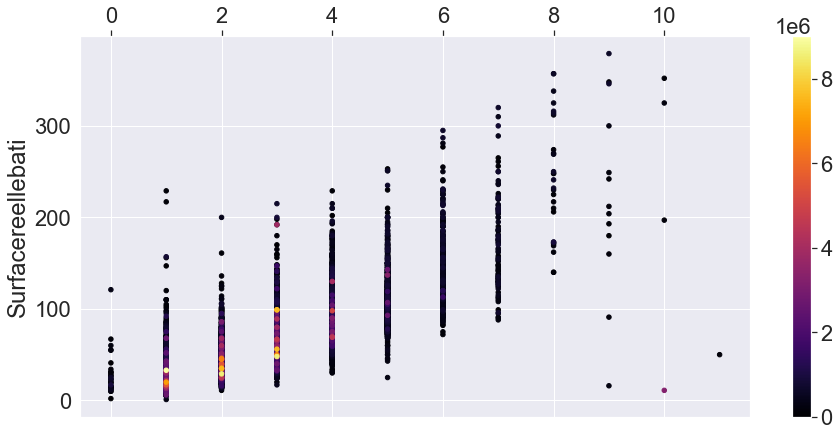

In [150]:
ax = pred.plot.scatter(x='Nombrepiecesprincipales', y='Surfacereellebati',
                     c=pred.Valeurfonciere.sort_values(ascending=True), 
                     colormap='inferno', figsize=(15,7))
ax.xaxis.tick_top()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



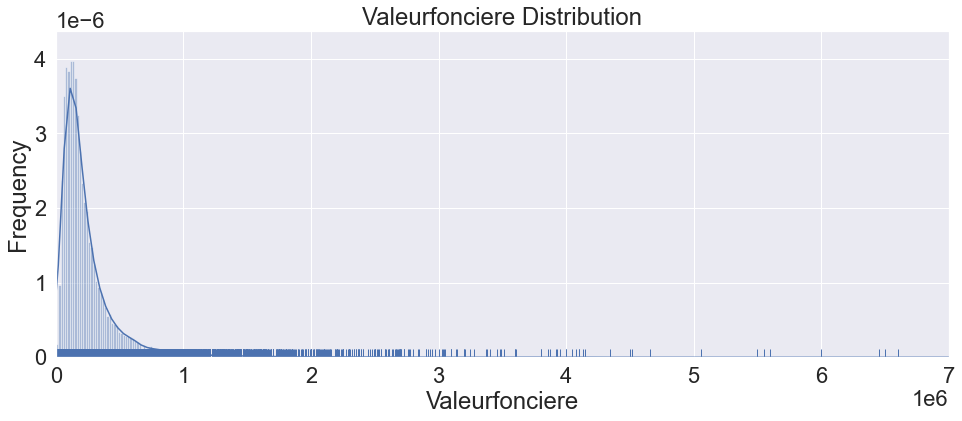

In [151]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(pred['Valeurfonciere'], bins= 500, rug=True)
ax.set_xlim([0, 7000000])
ax.set_title('Valeurfonciere Distribution')
ax.set_ylabel('Frequency');

In [152]:
# corrmat = df.corr()
# cols = corrmat.nlargest(30, 'Valeurfonciere')['Valeurfonciere'].index
# # cm = np.corrcoef(pred[cols].values.T)
# sns.set(font_scale=1.5)
# plt.figure(figsize=(15, 10))

# hm = sns.heatmap(pred,cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.yticks(rotation=0)
# plt.xticks(rotation=90)
# plt.show()

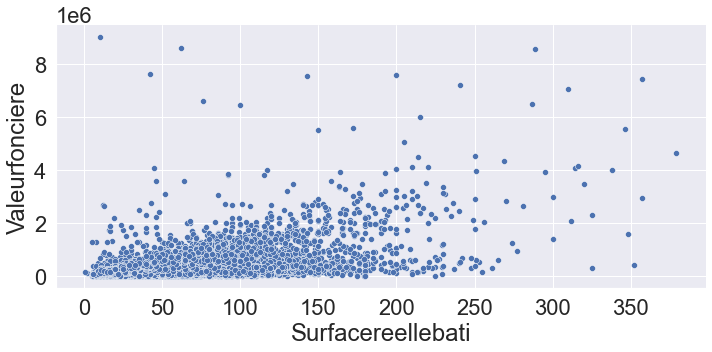

In [153]:
 sns.relplot(data=pred, x='Surfacereellebati', y='Valeurfonciere',
                 legend='full', height=5, aspect=2)

In [154]:
# plt.figure(figsize=(16,7))
# sns.barplot(data = pred, x='Codepostal', y='Valeurfonciere')
# plt.xticks(rotation=55)
# plt.title('vf Par Zipcode')

# randomforest

In [155]:
from sklearn.ensemble import RandomForestRegressor
x_rf = pred.iloc[:, :-1].values
y_rf = pred['Valeurfonciere'].values
xtrain_rf, xtest_rf, ytrain_rf, ytest_rf = train_test_split(x_rf, y_rf, test_size=0.3, random_state=1)

forest_rf = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest_rf.fit(xtrain_rf, ytrain_rf)
ytrainpredict_rf = forest_rf.predict(xtrain_rf)
ytestpredict_rf = forest_rf.predict(xtest_rf)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



In [157]:
# # Le RMSE mesure la distance entre nos valeurs prédites et les valeurs réelles.
# from sklearn.metrics import mean_squared_error 
# print(f'MAE train: {metrics.mean_absolute_error(ytrain_rf, ytrainpredict_rf)}, test: {metrics.mean_absolute_error(ytest_rf, ytestpredict_rf)}')
# print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {np.sqrt(metrics.mean_squared_error(ytest_rf, ytestpredict_rf))}')
# print(f'R^2 train: {(r2_score(ytrain_rf, ytrainpredict_rf))}, test: {(r2_score(ytest_rf, ytestpredict_rf))}')
# print(f'MSE train: {(mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {(mean_squared_error(ytest_rf, ytestpredict_rf))}')

No handles with labels found to put in legend.


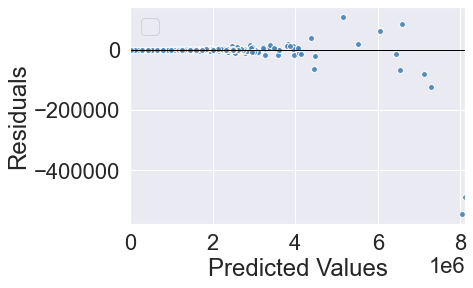

In [158]:
plt.scatter(ytrainpredict_rf, ytrainpredict_rf-ytrain_rf, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_rf.min()-2, xmax=ytrainpredict_rf.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_rf.min()-1, ytrainpredict_rf.max()+1])
plt.show()

No handles with labels found to put in legend.


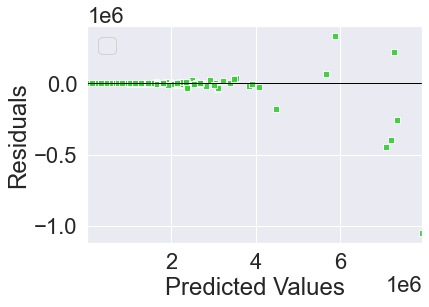

In [159]:
plt.scatter(ytestpredict_rf, ytestpredict_rf-ytest_rf, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_rf.min()-1, xmax=ytestpredict_rf.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rf.min()-1, ytestpredict_rf.max()+1])
plt.show()

# Predicting immo vf using KNN Regression



In [160]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import cufflinks as cf
import sklearn
from sklearn import svm, preprocessing 
import seaborn as sns
import plotly.graph_objs as go
# import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [163]:
pred = sklearn.utils.shuffle(pred, random_state = 42)
X = pred.drop(['Valeurfonciere'], axis = 1).values
X = preprocessing.scale(X)
y = pred['Valeurfonciere'].values
y = preprocessing.scale(y)

In [164]:
test_size = 200
X_train = X[: -test_size]
y_train = y[: -test_size]
X_test = X[-test_size :]
y_test =  y[-test_size :]

In [165]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))    

In [166]:
trace0 = go.Scatter(
    y = score,
    x = np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

In [167]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 12, Max Accuracy = 10.771385612512208


In [168]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.10771385612512208


In [169]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual Price',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted Price',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Normalized Price')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)

# LinearRegression

In [170]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33) 

In [171]:
from sklearn import linear_model 
lr = linear_model.LinearRegression() 

In [172]:
model = lr.fit(X_train, y_train)
 

In [173]:
 print ("R^2: \n", model.score(X_test, y_test))

R^2: 
 0.24497572310916993


In [174]:
# On remarque qu'environ 27% de la variance de notre variable cible est expliquée nos caractéristiques 

In [175]:
predictions = model.predict(X_test)

In [176]:
from sklearn.metrics import mean_squared_error 
print ('Le RMSE est: \n', mean_squared_error(y_test, predictions)) 
# Le RMSE mesure la distance entre nos valeurs prédites et les valeurs réelles.

Le RMSE est: 
 0.8046633359321674


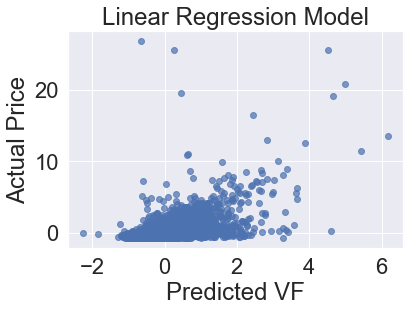

In [177]:
actual_values = y_test 
plt.scatter(predictions, actual_values,alpha=.7, color='b') #alpha helps to show overlapping data 
plt.xlabel('Predicted VF') 
plt.ylabel('Actual Price') 
plt.title('Linear Regression Model') 
plt.show() 

In [178]:
 #base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27335, 6)
(6834, 6)
(27335,)
(6834,)


In [179]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)

LinearRegression()

In [180]:
#linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
lr_pred = reg.predict(X_test)
print(reg.coef_)

[ 0.19756168 -0.04586542  0.63871566 -0.20143413  0.03851636 -0.03851636]


In [181]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_pred,y_test)

0.775054496918085

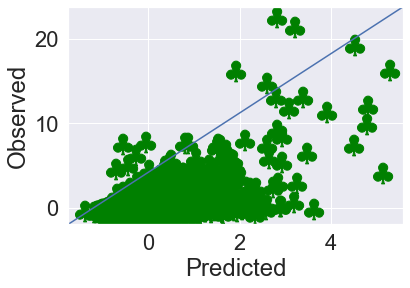

In [182]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(lr_pred, y_test, s=500, alpha=1,marker=r'$\clubsuit$',label="Luck",facecolor='green')
# plt.scatter(lr_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Observed")

plt.show()


In [184]:
# r2_lr = r2_score(y_test, lr_pred)*100
# mae_lr = mean_absolute_error(y_test, lr_pred)
# mse_lr = mean_squared_error(y_test, lr_pred)
# print([r2_lr, mae_lr, mse_lr])